In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
np.math=math
from scipy.integrate import odeint
import pysindy as ps
import scienceplots
from pysindy.differentiation import FiniteDifference
plt.style.use('science')

In [2]:
s=10
r=28
b=8/3
def Lorentz(y, t): #Ecuaciones de Henon Heiles
    x1,x2,x3  = y
    dydt = [s*(x2-x1)
            ,x1*(r-x3)-x2
            ,x1*x2-b*x3]
    return dydt

dt = 0.005
c.i: [-8, 7, 27]
[[ 0.         -9.99446122  9.99445876  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.         27.95014828 -0.99027313  0.          0.          0.
  -0.99860449  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.         -2.66471265  0.          0.99926585
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]
(x0)' = -9.994 x0 + 9.994 x1
(x1)' = 27.950 x0 + -0.990 x1 + -0.999 x0 x2
(x2)' = -2.665 x2 + 0.999 x0 x1


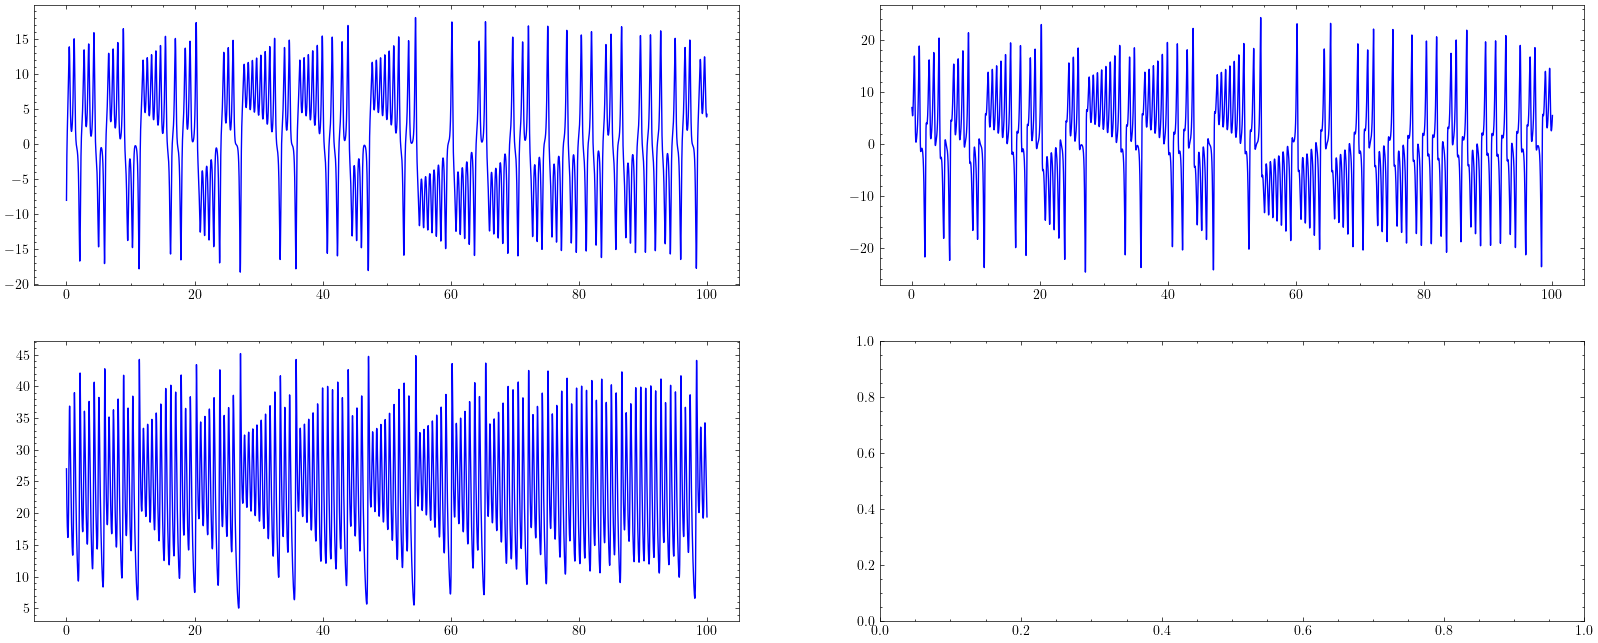

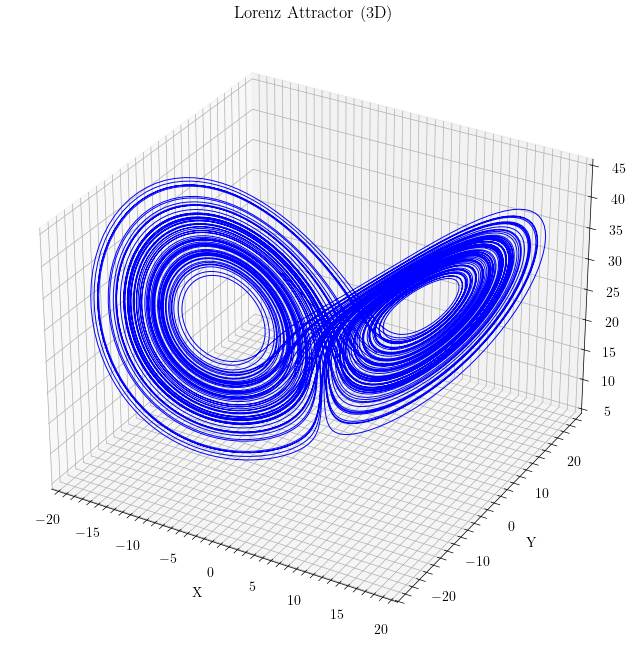

In [3]:

dt=0.005
k=1
t = np.arange(0, 100, dt)
x_arr = odeint(Lorentz, [-8,7,27], t)
print('dt =', dt) #Pasos en dt
print('c.i:',[-8,7,27])
print('===========================================')
#Gráficas de series temporales#############   
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].plot(t, x_arr[:, 0], "b")
axs[0, 1].plot(t, x_arr[:, 1], "b")
axs[1, 0].plot(t, x_arr[:, 2], "b")
fig.show()

########Calculo de Derivadas##############
fd = FiniteDifference(order=2, drop_endpoints=True)
dx_arr = fd._differentiate(x_arr, t=dt) # Still pass dt

##########SINDy###############
threshold =0.7

model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold),
                 feature_library=ps.PolynomialLibrary(degree=3),
                 differentiation_method=fd) # Pass the differentiation method here
model.fit(x_arr, t=dt) # Also important to pass dt here

#############Coeficientes del modelo de ajuste#################
coef = model.coefficients()
print(coef[:, :])
print('===========================================')
model.print()
print('===========================================')
#GRAFICA DEL SISTEMA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_arr[:, 0], x_arr[:, 1], x_arr[:, 2], 'b', linewidth=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor (3D)')
plt.show()

In [4]:
print(x_arr)

noise_level = 0.005  # 5% del rango típico de la señal
amplitude = np.max(np.abs(x_arr))
sigma = noise_level * amplitude
noise = np.random.normal(loc=0.0, scale=sigma, size=x_arr.shape)
x_noisy = x_arr + noise
print("-------------------------------")
print(x_noisy)

[[-8.          7.         27.        ]
 [-7.27044981  6.91526039 26.37860174]
 [-6.58102263  6.81474517 25.79314907]
 ...
 [ 4.15560658  5.16964309 19.72101878]
 [ 4.20869399  5.31813564 19.56873277]
 [ 4.26654994  5.47134809 19.42308374]]
-------------------------------
[[-8.02540629  6.80733404 26.75846245]
 [-6.99599016  7.25618591 26.40482458]
 [-6.91187664  6.73643515 25.77394155]
 ...
 [ 4.15131416  5.21084218 19.60934485]
 [ 4.05004527  5.43412711 19.58193788]
 [ 4.65617381  5.53793266 19.82409877]]


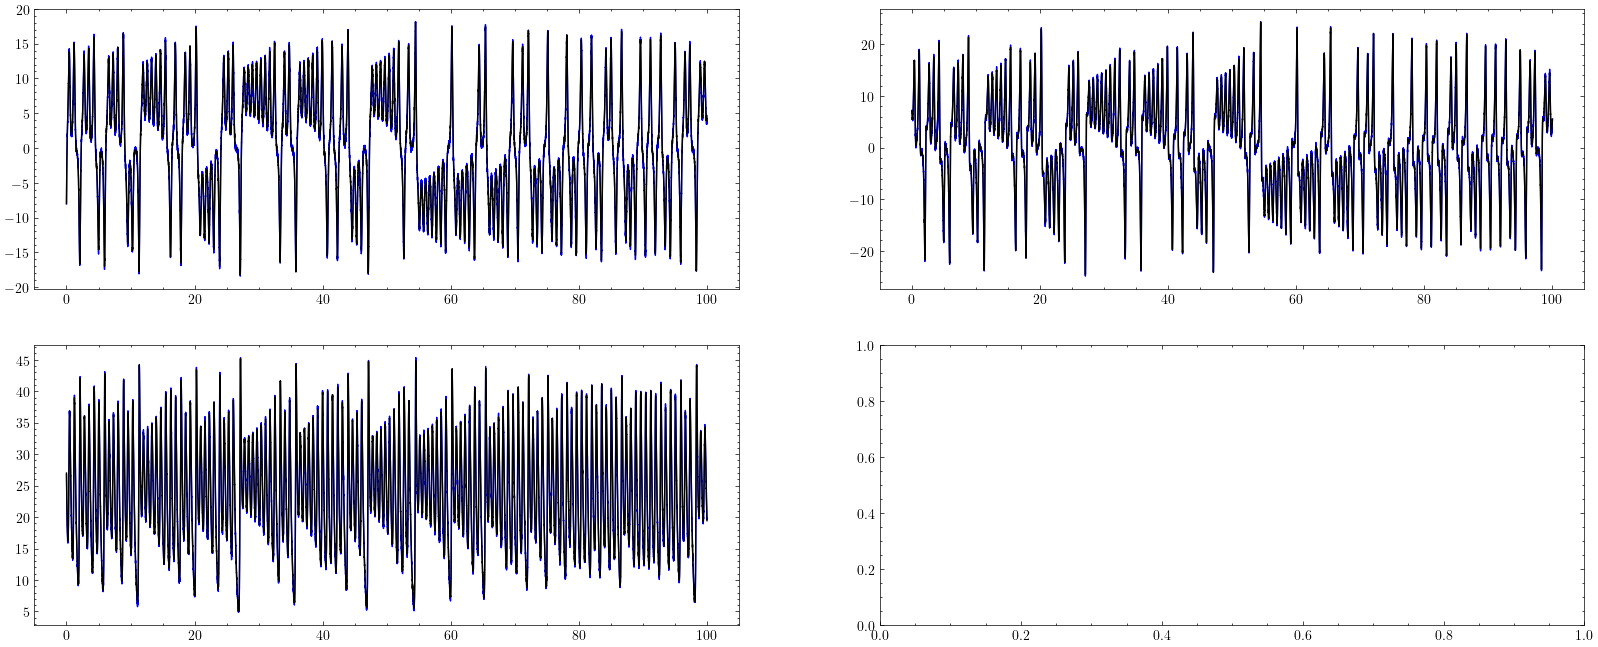

In [5]:
#Gráficas de series temporales#############   
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].plot(t, x_noisy[:, 0], "b")
axs[0, 1].plot(t, x_noisy[:, 1], "b")
axs[1, 0].plot(t, x_noisy[:, 2], "b")

axs[0, 0].plot(t, x_arr[:, 0], "k")
axs[0, 1].plot(t, x_arr[:, 1], "k")
axs[1, 0].plot(t, x_arr[:, 2], "k")
fig.show()

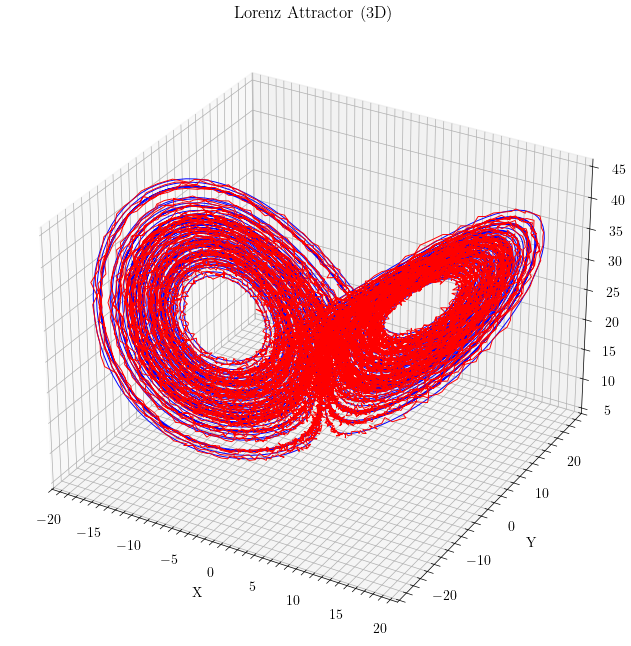

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_arr[:, 0], x_arr[:, 1], x_arr[:, 2], 'b', linewidth=0.7)
ax.plot(x_noisy[:, 0], x_noisy[:, 1], x_noisy[:, 2], 'r', linewidth=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor (3D)')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp,odeint
import scienceplots
plt.style.use('science')

[0, 1.1515, 0, np.float64(1.0226170556150838)]


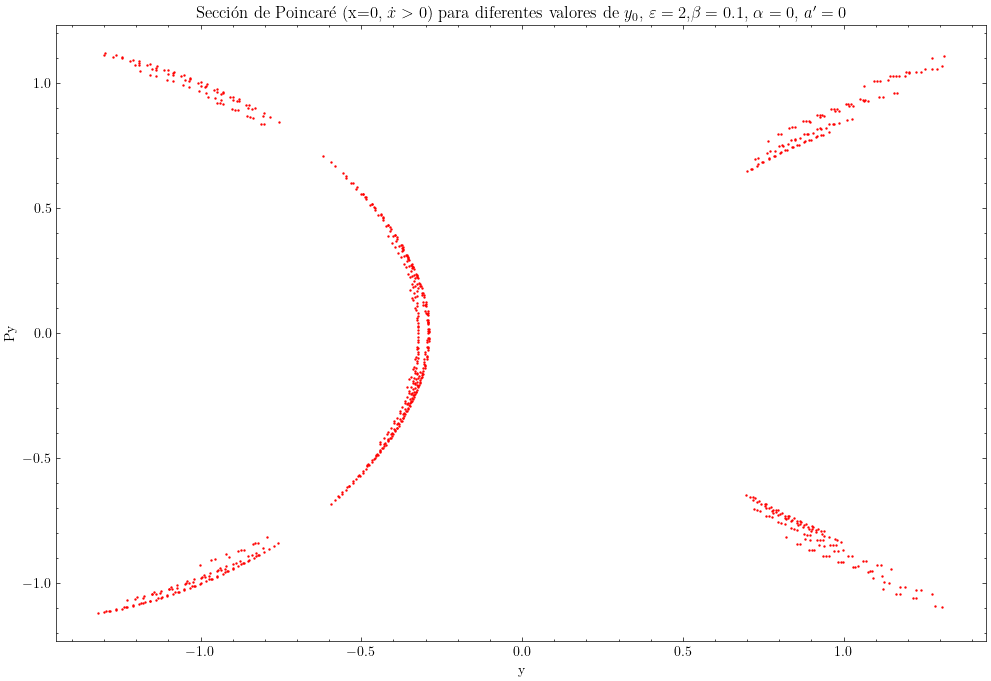

In [5]:
def safe_sqrt(x):
    return np.sqrt(np.clip(x, 0, None))

En = 2
beta = 1
alpha =1
a = 1
b=1
def hamilton_eqs(t, R):
    x, y, px, py = R
    dx_dt = px + beta*(y/2)
    dy_dt = py - beta*(x/2)
    dpx_dt = ((2*beta*py-beta**2*x)/2+((2*alpha*x+2*a*alpha)/((a**2+2*a*x+x**2+y**2)**(3/2)))+((2*alpha*x-2*alpha*a)/((a**2-2*a*x+x**2+y**2)**(3/2))))/2
    dpy_dt = ((-2*beta*px-y*beta**2)/2+((2*y*alpha)/((a**2-2*a*x+x**2+y**2)**(3/2)))+((2*y*alpha)/((a**2+2*a*x+x**2+y**2)**(3/2))))/2
    return [dx_dt, dy_dt, dpx_dt, dpy_dt]

plt.figure(figsize=(12, 8))
t_span=(0,500)
t_eval=np.linspace(t_span[0],t_span[1],10000)
x_0=0
y_0=1.1515
px_0=0
discriminant=2*En-(b**2*y_0**2)/4-4/safe_sqrt(a**2+y_0**2)
py_0= safe_sqrt(discriminant)
y0=[x_0,y_0,px_0,py_0]
sol = solve_ivp(hamilton_eqs, t_span, y0, method='RK45', t_eval=t_eval, rtol=1e-6, atol=1e-8)

poincare_y = []
poincare_py = []

for i in range(len(sol.t) - 1):
    if np.abs(sol.y[0, i]) < 1e-1 and sol.y[2, i] > 0:
        poincare_y.append(sol.y[1, i])
        poincare_py.append(sol.y[3, i])

if poincare_y:
    plt.scatter(poincare_y, poincare_py, s=0.5, color='r', label=f"y_0 = {y_0:.2f}")
print(y0)
plt.xlabel("y")
plt.ylabel("Py")
plt.title(r"Sección de Poincaré (x=0, $\dot{x}>0$) para diferentes valores de $y_0$, $\varepsilon=2$,$\beta=0.1$, $\alpha=0$, $a^\prime=0$")
plt.show()

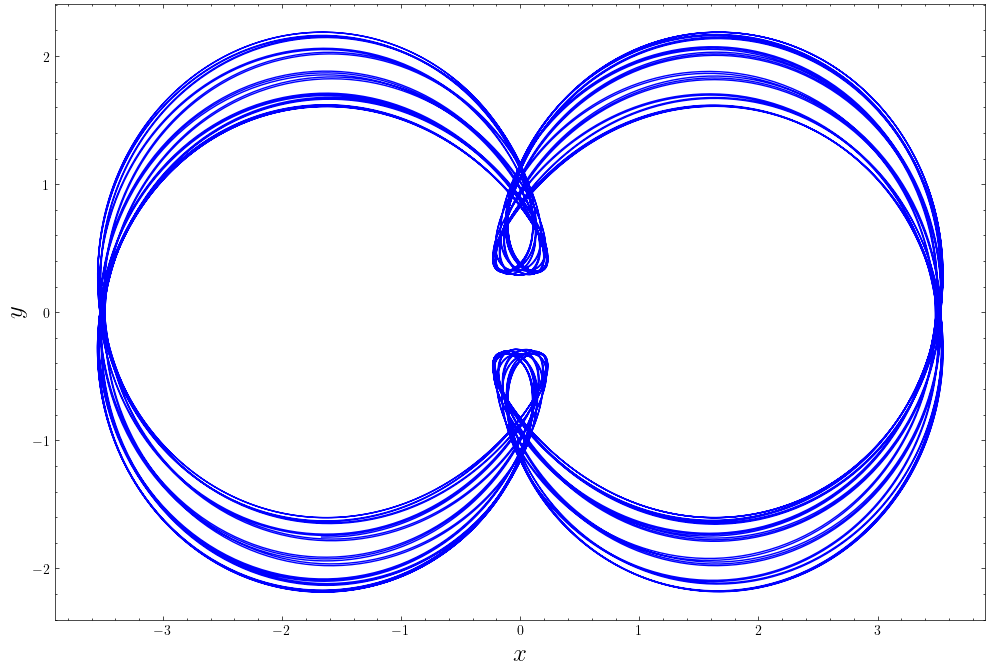

In [6]:
x_arr_test=[sol.y[0],sol.y[1],sol.y[2],sol.y[3]]
plt.figure(figsize=(12, 8))
plt.plot(x_arr_test[0],x_arr_test[1],'b-')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$y$",fontsize=18)
plt.savefig("trayectoria-cuasiperiodica.png")
plt.show()

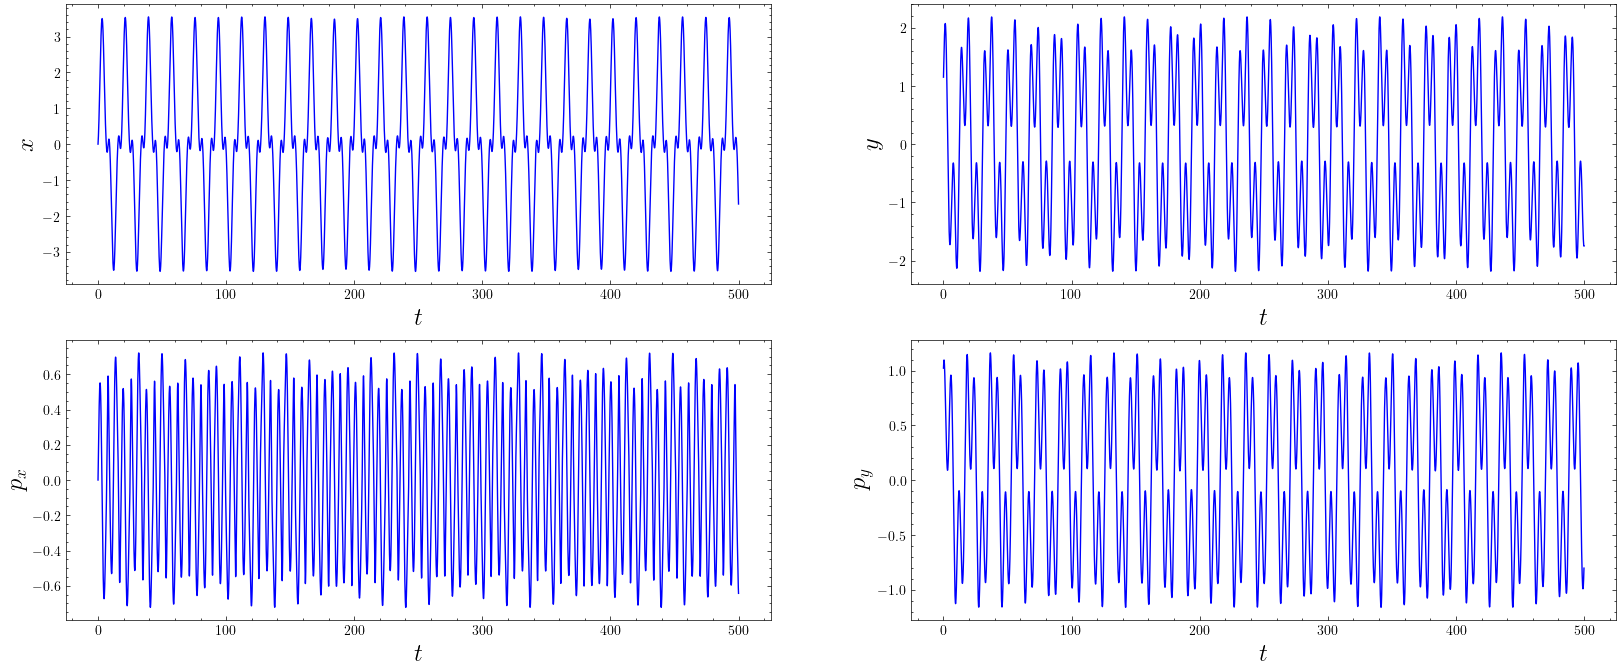

In [7]:
def safe_sqrt(x):
    return np.sqrt(np.clip(x, 0, None))

En = 2
beta = 1
alpha =1
a = 1

def hamilton_eqs(R,t):#Ecuaciones de Movimiento
    x, y, px, py = R
    dRdt=[px + beta*(y/2)
          ,py - beta*(x/2)
          ,((2*beta*py-beta**2*x)/2+((2*alpha*x+2*a*alpha)/((a**2+2*a*x+x**2+y**2)**(3/2)))+((2*alpha*x-2*alpha*a)/((a**2-2*a*x+x**2+y**2)**(3/2))))/2
          ,((-2*beta*px-y*beta**2)/2+((2*y*alpha)/((a**2-2*a*x+x**2+y**2)**(3/2)))+((2*y*alpha)/((a**2+2*a*x+x**2+y**2)**(3/2))))/2
          ]
    return dRdt

def coefficients(self):
    check_is_fitted(self, "model")
    return self.model.steps[-1][1].coef_

dt=0.005
k=1
t = np.arange(0, 500, dt)
x_arr_mine = odeint(hamilton_eqs,y0,t)
print('===========================================')
#Gráficas de series temporales#############   
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].plot(t, x_arr_mine[:,0], "b")
axs[0, 0].set_xlabel(r"$t$",fontsize=18)
axs[0, 0].set_ylabel(r"$x$",fontsize=18)
axs[0, 1].plot(t, x_arr_mine[:,1], "b")
axs[0, 1].set_xlabel(r"$t$",fontsize=18)
axs[0, 1].set_ylabel(r"$y$",fontsize=18)
axs[1, 0].plot(t, x_arr_mine[:,2], "b")
axs[1, 0].set_xlabel(r"$t$",fontsize=18)
axs[1, 0].set_ylabel(r"$p_x$",fontsize=18)
axs[1, 1].plot(t, x_arr_mine[:,3], "b")
axs[1, 1].set_xlabel(r"$t$",fontsize=18)
axs[1, 1].set_ylabel(r"$p_y$",fontsize=18)
fig.show()
plt.savefig("Evolucion-temporal.png")

In [6]:
########Calculo de Derivadas##############
fd = FiniteDifference(order=2, drop_endpoints=True)
dx_arr_mine = fd._differentiate(x_arr_mine, t=dt) # Still pass dt
##############CREAR LIBRERIA DE FUNCIONES#####################
a = 1.0  # valor de a en tu sistema

def coulomb_fx(x, y):
    r1 = ((x - a)**2 + y**2)**(3/2)
    r2 = ((x + a)**2 + y**2)**(3/2)
    return (x - a)/r1 + (x + a)/r2

def coulomb_fy(x, y):
    r1 = ((x - a)**2 + y**2)**(3/2)
    r2 = ((x + a)**2 + y**2)**(3/2)
    return y * (1/r1 + 1/r2)
def name_fx(*vars):
    return "((x0 - a)/(((x0 - a)**2 + x1**2)**(3/2))) + ((x0 + a)/(((x0 + a)**2 + x1**2)**(3/2)))"

def name_fy(*vars):
    return "x1*(1/(((x0 - a)**2 + x1**2)**(3/2)) + 1/(((x0 + a)**2 + x1**2)**(3/2)))"

custom_lib = ps.CustomLibrary(library_functions=[coulomb_fx, coulomb_fy],function_names=[name_fx,name_fy])

library = ps.GeneralizedLibrary([ps.PolynomialLibrary(degree=4, include_interaction=True),custom_lib])

##########SINDy###############
threshold =0.1
model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold),
                 feature_library=library,
                 differentiation_method=fd) # Pass the differentiation method here
model.fit(x_arr_mine, t=dt) # Also important to pass dt here

#############Coeficientes del modelo de ajuste#################
coef = model.coefficients()
print(coef[:, :])
print('===========================================')
model.print()
print('===========================================')

[[ 0.          0.          0.50000041  0.99999048  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -0.49999828  0.          0.          0.9999946   0.
   0.          0.        

-------------------------------------------------------
azul= Solucion con ecuaciones de movimiento originales
azul= Solucion con ecuaciones de movimiento de SINDy


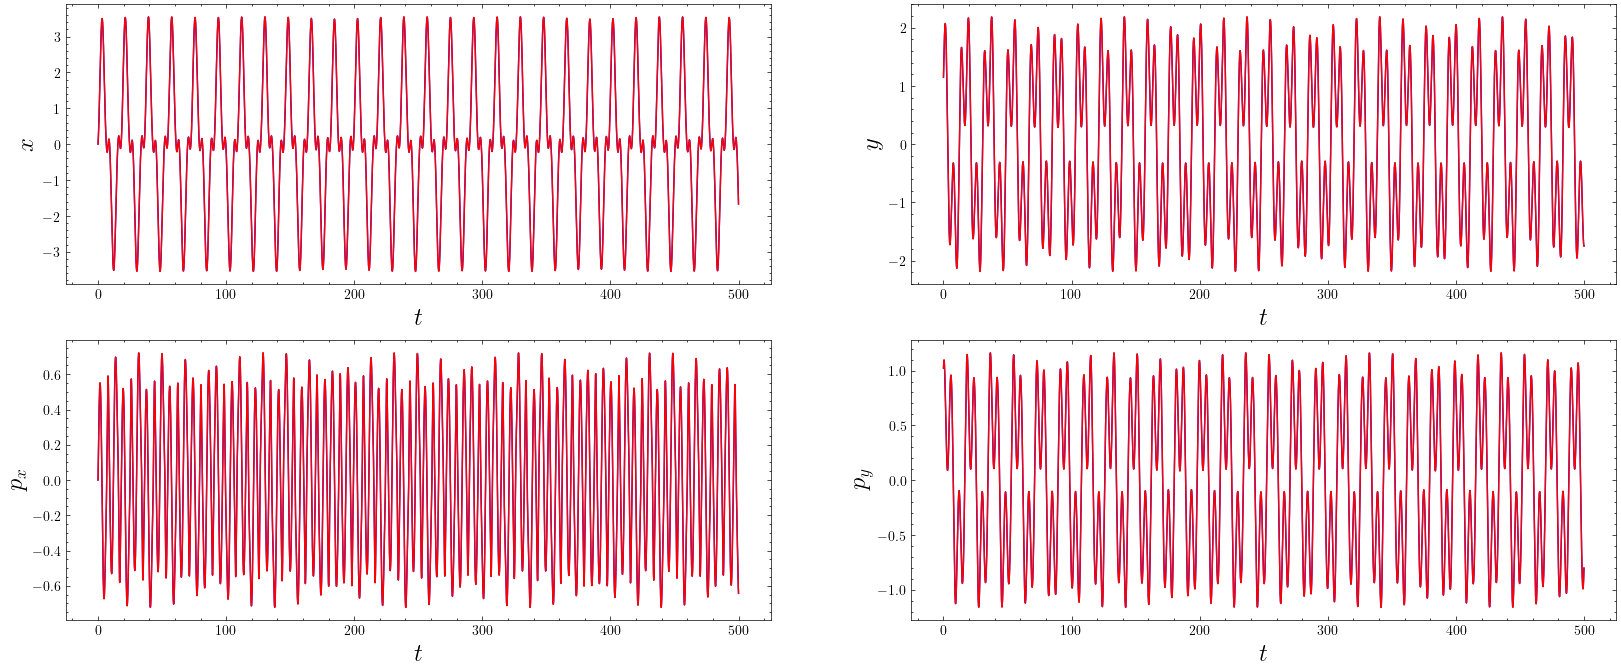

In [8]:
#MODELO SINDY
def eomSINDY(R,t):
    x0,x1,x2,x3=R
    dRdt=[0.5*x1+x2,
          x3-0.5*x0,
          -0.250*x0 + 0.500*x3 +(x0 - a)/(((x0 - a)**2 + x1**2)**(3/2)) + ((x0 + a)/(((x0 + a)**2 + x1**2)**(3/2))),
          -0.250*x1 + -0.500*x2 +x1*(1/(((x0 - a)**2 + x1**2)**(3/2)) + 1/(((x0 + a)**2 + x1**2)**(3/2)))
        ]
    return dRdt
x_arr_sindy = odeint(eomSINDY, [x_0, y_0, px_0, py_0], t)
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].plot(t, x_arr_mine[:, 0], "b")
axs[0, 0].plot(t, x_arr_sindy[:, 0], "r")
axs[0, 0].set_xlabel(r"$t$",fontsize=18)
axs[0, 0].set_ylabel(r"$x$",fontsize=18)
axs[0, 1].plot(t, x_arr_mine[:, 1], "b")
axs[0, 1].plot(t, x_arr_sindy[:, 1], "r")
axs[0, 1].set_xlabel(r"$t$",fontsize=18)
axs[0, 1].set_ylabel(r"$y$",fontsize=18)
axs[1, 0].plot(t, x_arr_mine[:, 2], "b")
axs[1, 0].plot(t, x_arr_sindy[:, 2], "r")
axs[1, 0].set_xlabel(r"$t$",fontsize=18)
axs[1, 0].set_ylabel(r"$p_x$",fontsize=18)
axs[1, 1].plot(t, x_arr_mine[:, 3], "b")
axs[1, 1].plot(t, x_arr_sindy[:, 3], "r")
axs[1, 1].set_xlabel(r"$t$",fontsize=18)
axs[1, 1].set_ylabel(r"$p_y$",fontsize=18)
fig.show()
plt.savefig("Evolucion-temporal-SINDy.png")
print('-------------------------------------------------------')
print('azul= Solucion con ecuaciones de movimiento originales')
print('azul= Solucion con ecuaciones de movimiento de SINDy')


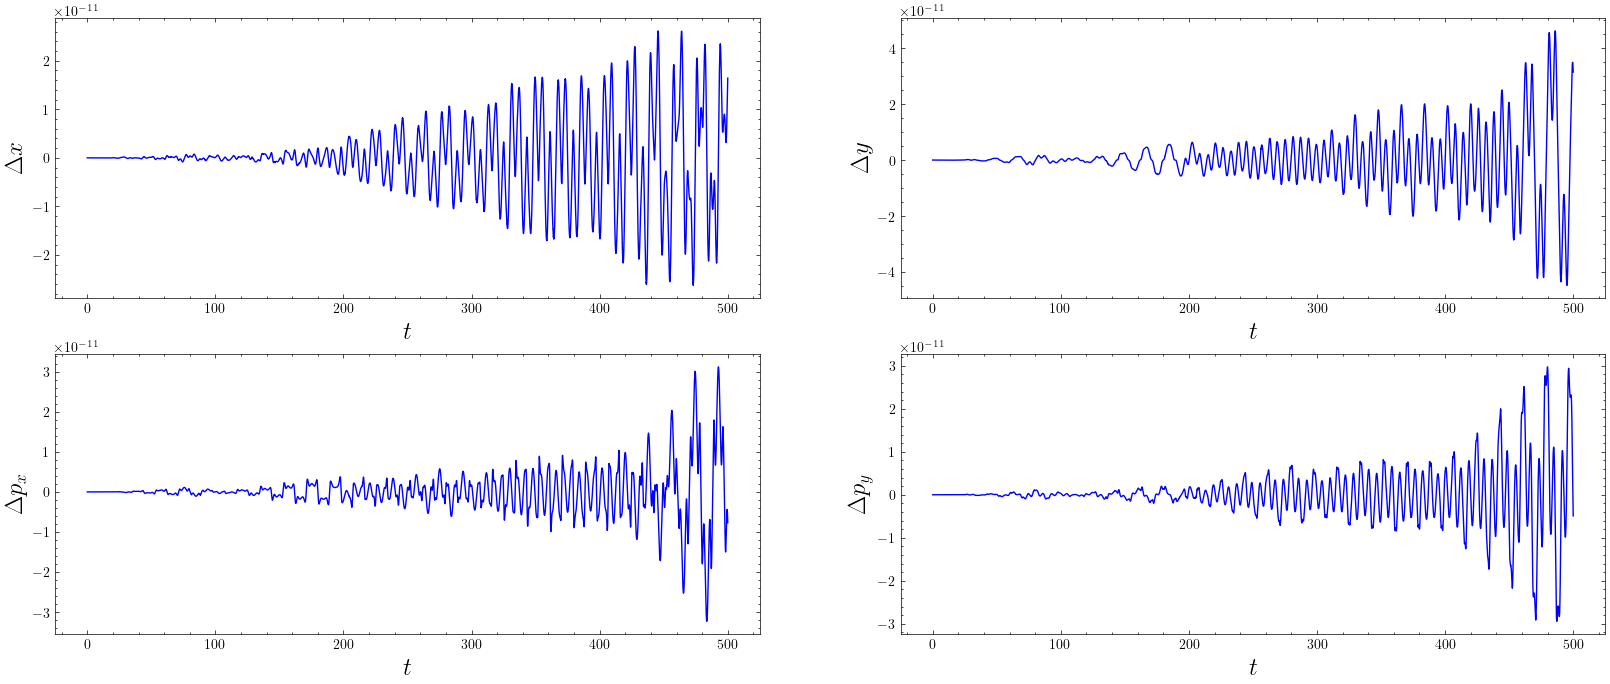

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].plot(t, x_arr_sindy[:, 0]-x_arr_mine[:, 0], "b")
axs[0, 0].set_xlabel(r"$t$",fontsize=18)
axs[0, 0].set_ylabel(r"$\Delta x$",fontsize=18)
axs[0, 1].plot(t, x_arr_sindy[:, 1]-x_arr_mine[:, 1], "b")
axs[0, 1].set_xlabel(r"$t$",fontsize=18)
axs[0, 1].set_ylabel(r"$\Delta y$",fontsize=18)
axs[1, 0].plot(t, x_arr_sindy[:, 2]-x_arr_mine[:, 2], "b")
axs[1, 0].set_xlabel(r"$t$",fontsize=18)
axs[1, 0].set_ylabel(r"$\Delta p_x$",fontsize=18)
axs[1, 1].plot(t, x_arr_sindy[:, 3]-x_arr_mine[:, 3], "b")
axs[1, 1].set_xlabel(r"$t$",fontsize=18)
axs[1, 1].set_ylabel(r"$\Delta p_y$",fontsize=18)
fig.show()
plt.savefig("error-cuasiperiodico-SINDy.png")

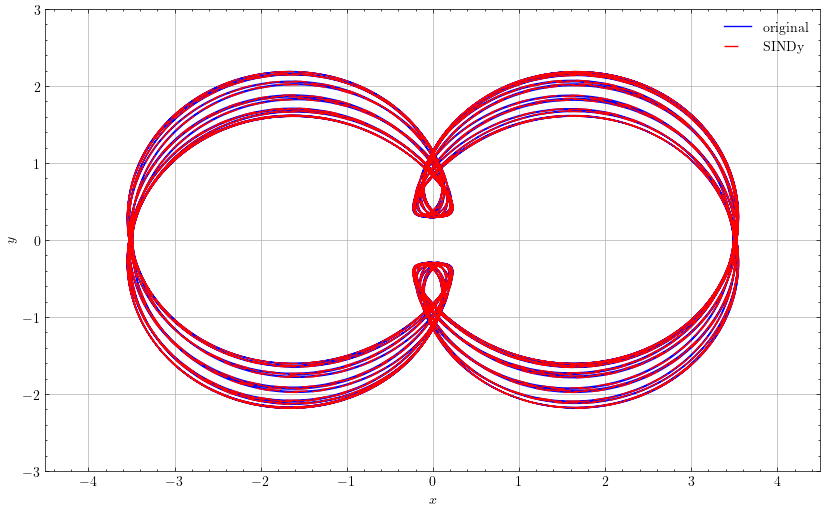

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x_arr_mine[:,0],x_arr_mine[:,1],'b-',label='original')
plt.plot(x_arr_sindy[:,0],x_arr_sindy[:,1],'r--',linestyle=(0,(10,10)),label='SINDy')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.ylim(-3,3)
plt.xlim(-4.5,4.5)
plt.grid()
plt.legend()
plt.savefig("Trayectoria-SINDy.png")
plt.show()

CAOS

[0, 1.6364, 0, np.float64(1.1156981982220484)]


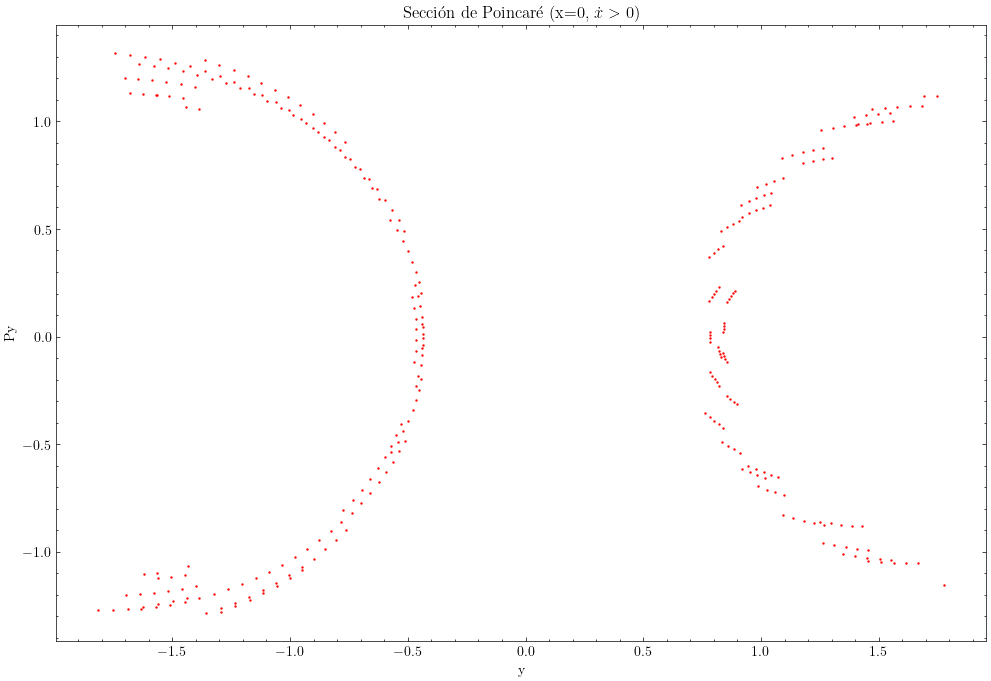

In [10]:
def safe_sqrt(x):
    return np.sqrt(np.clip(x, 0, None))

En = 2
beta = 1
alpha =1
a = 1

def hamilton_eqs(t, R):
    x, y, px, py = R
    dx_dt = px + beta*(y/2)
    dy_dt = py - beta*(x/2)
    dpx_dt = ((2*beta*py-beta**2*x)/2+((2*alpha*x+2*a*alpha)/((a**2+2*a*x+x**2+y**2)**(3/2)))+((2*alpha*x-2*alpha*a)/((a**2-2*a*x+x**2+y**2)**(3/2))))/2
    dpy_dt = ((-2*beta*px-y*beta**2)/2+((2*y*alpha)/((a**2-2*a*x+x**2+y**2)**(3/2)))+((2*y*alpha)/((a**2+2*a*x+x**2+y**2)**(3/2))))/2
    return [dx_dt, dy_dt, dpx_dt, dpy_dt]

plt.figure(figsize=(12, 8))
t_span=(0,500)
t_eval=np.linspace(t_span[0],t_span[1],10000)
x_0=0
y_0=1.6364
px_0=0
discriminant=2*En-(b**2*y_0**2)/4-4/safe_sqrt(a**2+y_0**2)
py_0=safe_sqrt(discriminant)
y0=[x_0,y_0,px_0,py_0]
sol = solve_ivp(hamilton_eqs, t_span, y0, method='RK45', t_eval=t_eval, rtol=1e-6, atol=1e-8)

poincare_y = []
poincare_py = []

for i in range(len(sol.t) - 1):
    if np.abs(sol.y[0, i]) < 1e-1 and sol.y[2, i] > 0:
        poincare_y.append(sol.y[1, i])
        poincare_py.append(sol.y[3, i])

if poincare_y:
    plt.scatter(poincare_y, poincare_py, s=0.5, color='r', label=f"y_0 = {y_0:.2f}")
print(y0)
plt.xlabel("y")
plt.ylabel("Py")
plt.title(r"Sección de Poincaré (x=0, $\dot{x}>0$)")
plt.show()

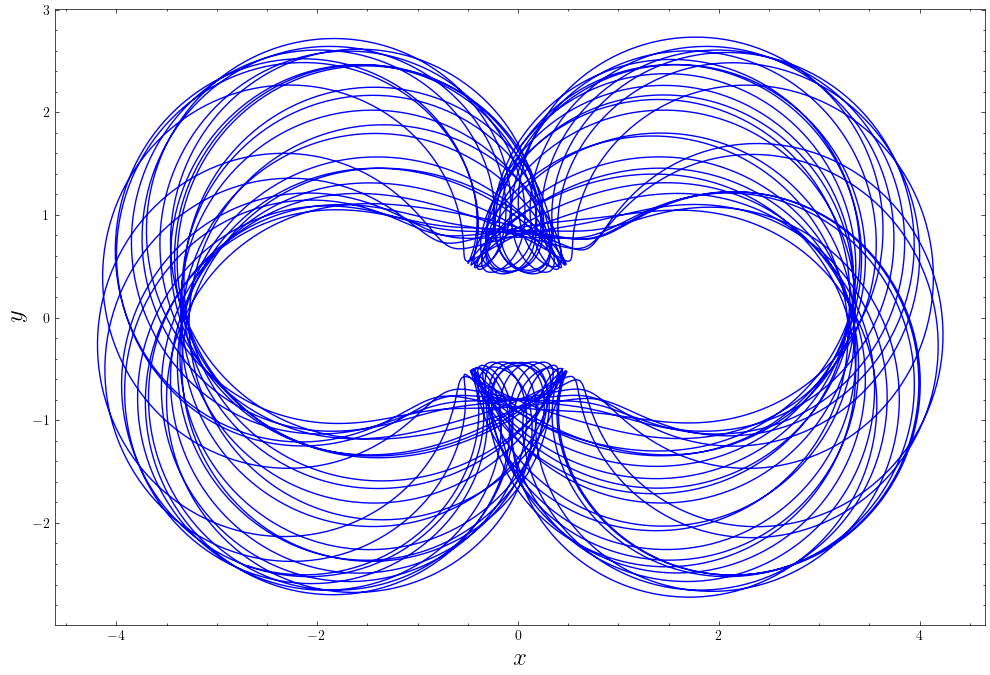

In [11]:
x_arr_test_chaos=[sol.y[0],sol.y[1],sol.y[2],sol.y[3]]
plt.figure(figsize=(12, 8))
plt.plot(x_arr_test_chaos[0],x_arr_test_chaos[1],'b-')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$y$",fontsize=18)
plt.savefig("trayectoria-chaos.png")
plt.show()

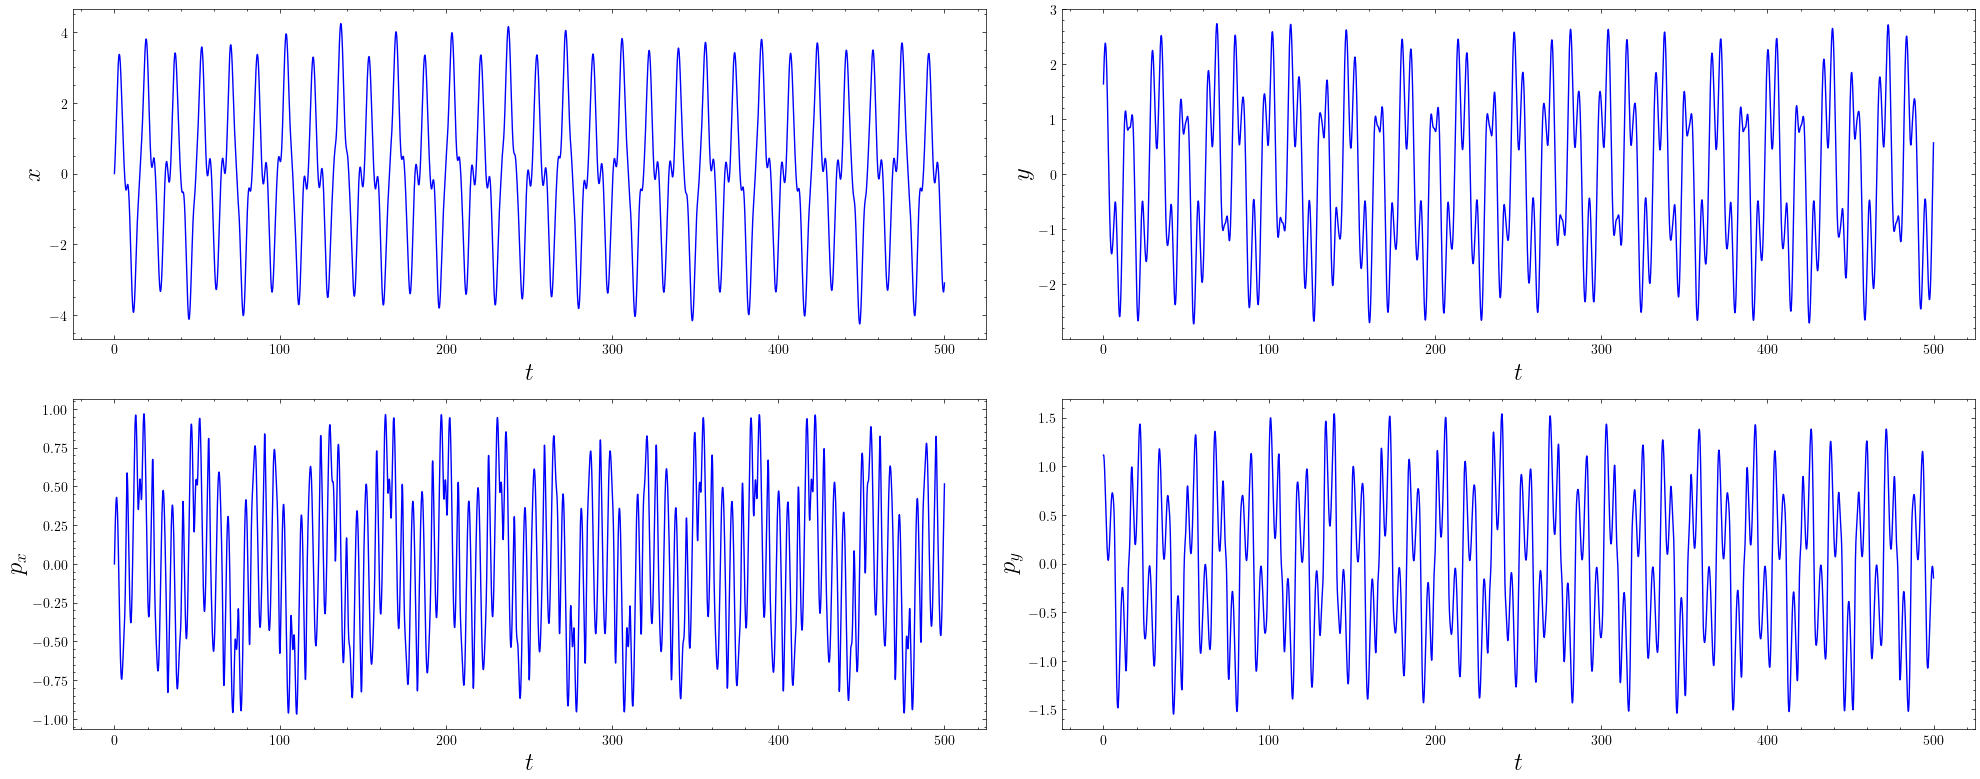

In [12]:
def hamilton_eqs(t, R):
    x, y, px, py = R
    dxdt = px + beta * y / 2
    dydt = py - beta * x / 2

    dpxdt = ( (2 * beta * py - beta**2 * x) / 2
             + (2 * alpha * x + 2 * a * alpha) / ((a**2 + 2*a*x + x**2 + y**2)**(3/2))
             + (2 * alpha * x - 2 * alpha * a) / ((a**2 - 2*a*x + x**2 + y**2)**(3/2)) ) / 2

    dpydt = ( (-2 * beta * px - y * beta**2) / 2
             + (2 * y * alpha) / ((a**2 - 2*a*x + x**2 + y**2)**(3/2))
             + (2 * y * alpha) / ((a**2 + 2*a*x + x**2 + y**2)**(3/2)) ) / 2

    return [dxdt, dydt, dpxdt, dpydt]


dt = 0.005
t_span = (0, 500)
t_eval = np.arange(t_span[0], t_span[1], dt)

sol = solve_ivp(hamilton_eqs, t_span, y0, t_eval=t_eval, method='RK45', rtol=1e-9, atol=1e-9)

x_arr_mine_chaos = sol.y.T
t = sol.t
fig, axs = plt.subplots(2, 2, figsize=(20, 8))

axs[0, 0].plot(t, x_arr_mine_chaos[:, 0], "b")
axs[0, 0].set_xlabel(r"$t$",fontsize=18)
axs[0, 0].set_ylabel(r"$x$",fontsize=18)

axs[0, 1].plot(t, x_arr_mine_chaos[:, 1], "b")
axs[0, 1].set_xlabel(r"$t$",fontsize=18)
axs[0, 1].set_ylabel(r"$y$",fontsize=18)

axs[1, 0].plot(t, x_arr_mine_chaos[:, 2], "b")
axs[1, 0].set_xlabel(r"$t$",fontsize=18)
axs[1, 0].set_ylabel(r"$p_x$",fontsize=18)

axs[1, 1].plot(t, x_arr_mine_chaos[:, 3], "b")
axs[1, 1].set_xlabel(r"$t$",fontsize=18)
axs[1, 1].set_ylabel(r"$p_y$",fontsize=18)

plt.tight_layout()
plt.savefig("Evolucion-temporal-chaos.png")
plt.show()

In [11]:
########Calculo de Derivadas##############
fd = FiniteDifference(order=2, drop_endpoints=True)
dx_arr_mine = fd._differentiate(x_arr_mine_chaos, t=dt) # Still pass dt
##############CREAR LIBRERIA DE FUNCIONES#####################
a = 1.0  # valor de a en tu sistema

def coulomb_fx(x, y):
    r1 = ((x - a)**2 + y**2)**(3/2)
    r2 = ((x + a)**2 + y**2)**(3/2)
    return (x - a)/r1 + (x + a)/r2

def coulomb_fy(x, y):
    r1 = ((x - a)**2 + y**2)**(3/2)
    r2 = ((x + a)**2 + y**2)**(3/2)
    return y * (1/r1 + 1/r2)
def name_fx(*vars):
    return "((x0 - a)/(((x0 - a)**2 + x1**2)**(3/2))) + ((x0 + a)/(((x0 + a)**2 + x1**2)**(3/2)))"

def name_fy(*vars):
    return "x1*(1/(((x0 - a)**2 + x1**2)**(3/2)) + 1/(((x0 + a)**2 + x1**2)**(3/2)))"

custom_lib = ps.CustomLibrary(library_functions=[coulomb_fx, coulomb_fy],function_names=[name_fx,name_fy])

library = ps.GeneralizedLibrary([ps.PolynomialLibrary(degree=4, include_interaction=True),custom_lib])

##########SINDy###############
threshold =0.01
model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold),
                 feature_library=library,
                 differentiation_method=fd) # Pass the differentiation method here
model.fit(x_arr_mine, t=dt) # Also important to pass dt here

#############Coeficientes del modelo de ajuste#################
coef = model.coefficients()
print(coef[:, :])
print('===========================================')
model.print()
print('===========================================')

[[ 0.          0.          0.50000041  0.99999048  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -0.49999828  0.          0.          0.9999946   0.
   0.          0.        

-------------------------------------------------------
azul= Solucion con ecuaciones de movimiento originales
azul= Solucion con ecuaciones de movimiento de SINDy


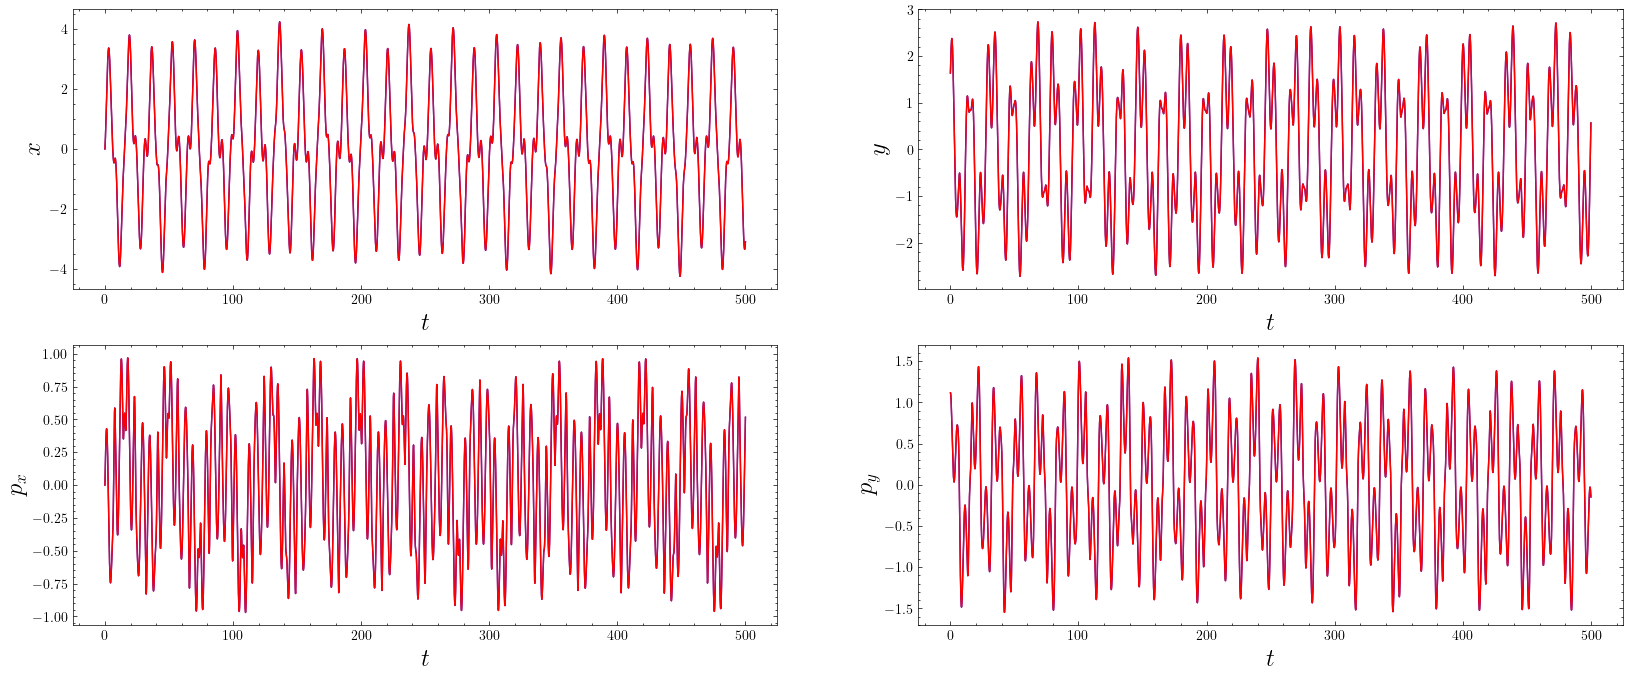

In [13]:
#MODELO SINDY
def eomSINDY(t,R):
    x0,x1,x2,x3=R
    dx0_dt=0.5*x1+x2
    dx1_dt=x3-0.5*x0
    dx2_dt=-0.250*x0 + 0.500*x3 +(x0 - a)/(((x0 - a)**2 + x1**2)**(3/2)) + ((x0 + a)/(((x0 + a)**2 + x1**2)**(3/2)))
    dx3_dt=-0.250*x1 + -0.500*x2 +x1/(((x0 - a)**2 + x1**2)**(3/2))+ x1/(((x0 + a)**2 + x1**2)**(3/2))
    return [dx0_dt,dx1_dt,dx2_dt,dx3_dt]
dt=0.005
y0=[x_0,y_0,px_0,py_0]
t_span = (0, 500)
t_eval = np.arange(t_span[0], t_span[1], dt)

sol_chaos = solve_ivp(eomSINDY, t_span, y0, t_eval=t_eval, method='RK45', rtol=1e-9, atol=1e-9)

x_arr_sindy_chaos = sol_chaos.y.T
t = sol.t
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].plot(t, x_arr_mine_chaos[:, 0], "b")
axs[0, 0].plot(t, x_arr_sindy_chaos[:, 0], "r")
axs[0, 0].set_xlabel(r"$t$",fontsize=18)
axs[0, 0].set_ylabel(r"$x$",fontsize=18)
axs[0, 1].plot(t, x_arr_mine_chaos[:, 1], "b")
axs[0, 1].plot(t, x_arr_sindy_chaos[:, 1], "r")
axs[0, 1].set_xlabel(r"$t$",fontsize=18)
axs[0, 1].set_ylabel(r"$y$",fontsize=18)
axs[1, 0].plot(t, x_arr_mine_chaos[:, 2], "b")
axs[1, 0].plot(t, x_arr_sindy_chaos[:, 2], "r")
axs[1, 0].set_xlabel(r"$t$",fontsize=18)
axs[1, 0].set_ylabel(r"$p_x$",fontsize=18)
axs[1, 1].plot(t, x_arr_mine_chaos[:, 3], "b")
axs[1, 1].plot(t, x_arr_sindy_chaos[:, 3], "r")
axs[1, 1].set_xlabel(r"$t$",fontsize=18)
axs[1, 1].set_ylabel(r"$p_y$",fontsize=18)
fig.show()
plt.savefig("Evolucion-temporal-SINDy-chaos.png")
print('-------------------------------------------------------')
print('azul= Solucion con ecuaciones de movimiento originales')
print('azul= Solucion con ecuaciones de movimiento de SINDy')

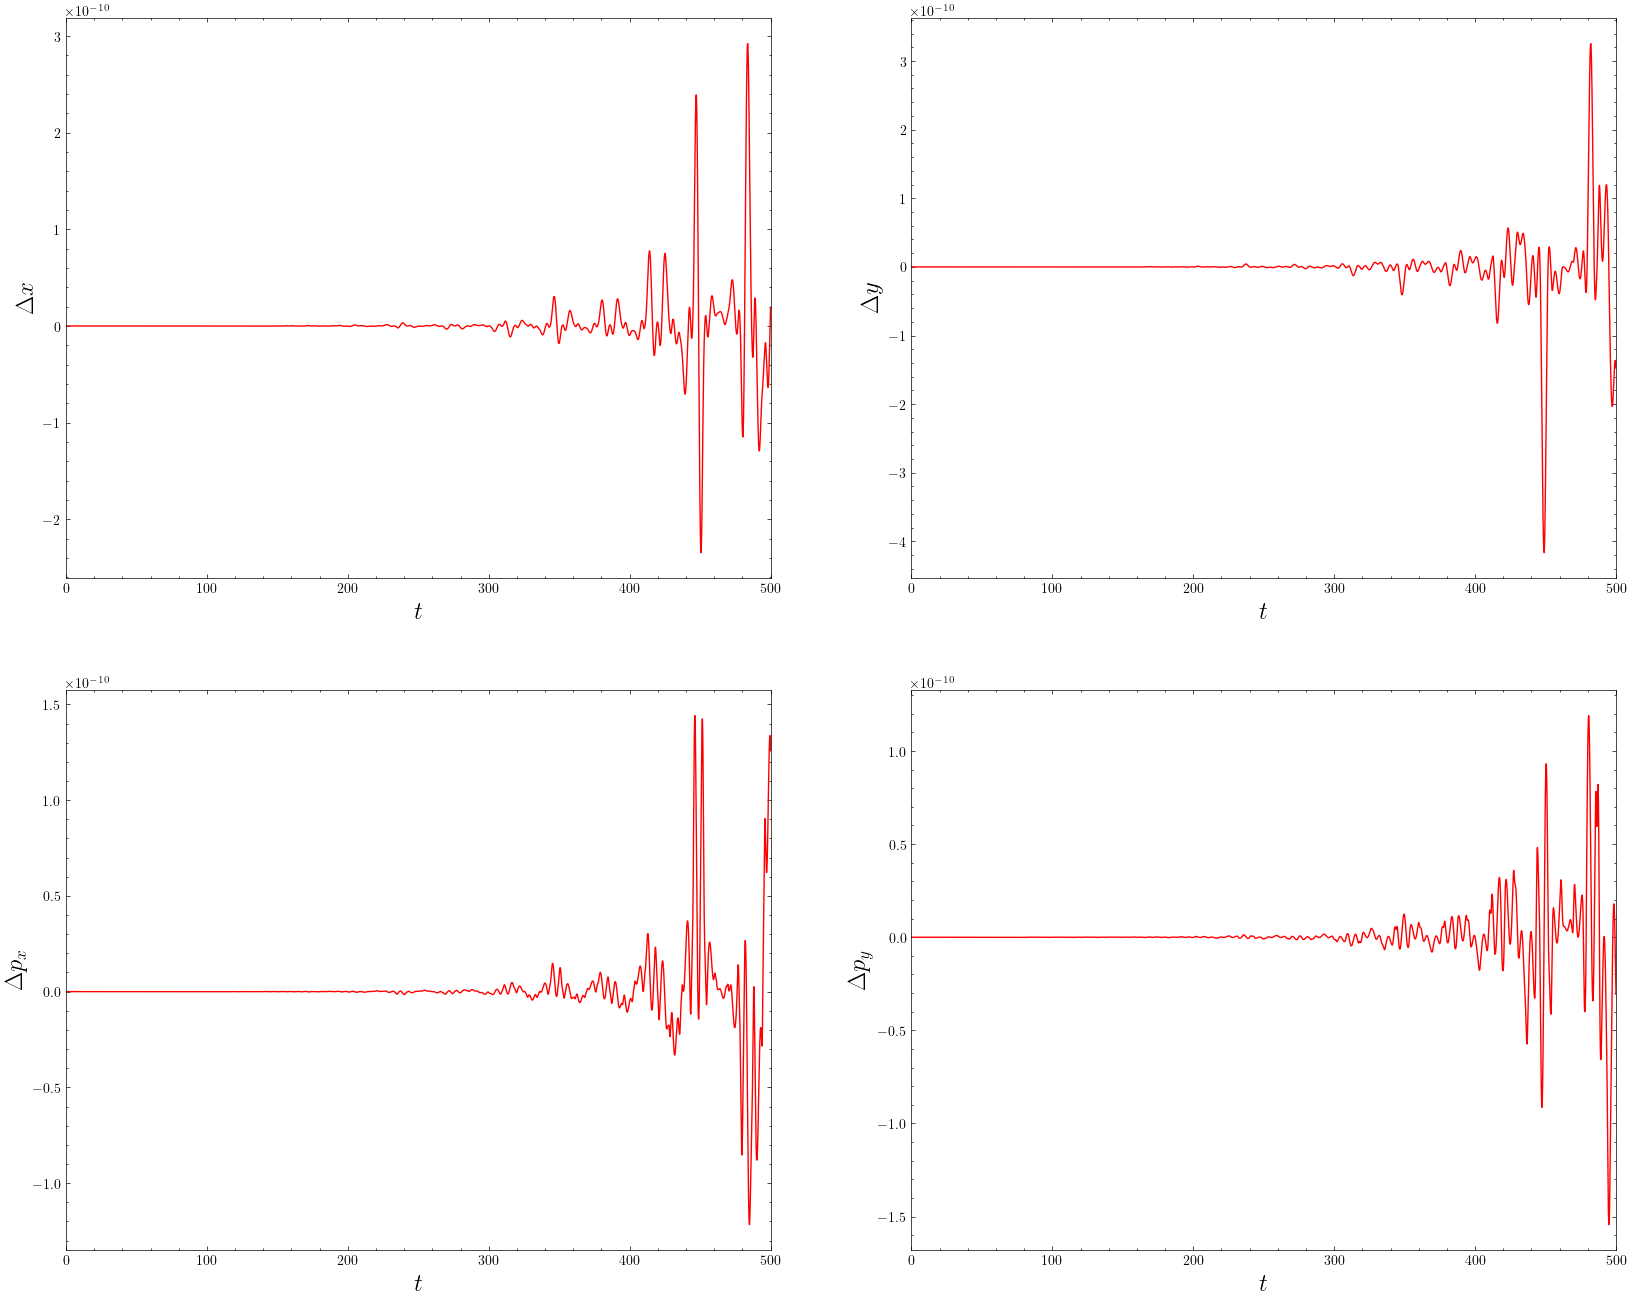

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
axs[0, 0].plot(t, -x_arr_mine_chaos[:, 0]+x_arr_sindy_chaos[:, 0], "r")
axs[0, 0].set_xlim(0,500)
axs[0, 0].set_xlabel(r"$t$",fontsize=18)
axs[0, 0].set_ylabel(r"$\Delta x$",fontsize=18)
axs[0, 1].plot(t, -x_arr_mine_chaos[:, 1]+x_arr_sindy_chaos[:, 1], "r")
axs[0, 1].set_xlim(0,500)
axs[0, 1].set_xlabel(r"$t$",fontsize=18)
axs[0, 1].set_ylabel(r"$\Delta y$",fontsize=18)
axs[1, 0].plot(t, -x_arr_mine_chaos[:, 2]+x_arr_sindy_chaos[:, 2], "r")
axs[1, 0].set_xlim(0,500)
axs[1, 0].set_xlabel(r"$t$",fontsize=18)
axs[1, 0].set_ylabel(r"$\Delta p_x$",fontsize=18)
axs[1, 1].plot(t, -x_arr_mine_chaos[:, 3]+x_arr_sindy_chaos[:, 3], "r")
axs[1, 1].set_xlim(0,500)
axs[1, 1].set_xlabel(r"$t$",fontsize=18)
axs[1, 1].set_ylabel(r"$\Delta p_y$",fontsize=18)
fig.show()
plt.savefig("error-chaos-SINDy-2.png")

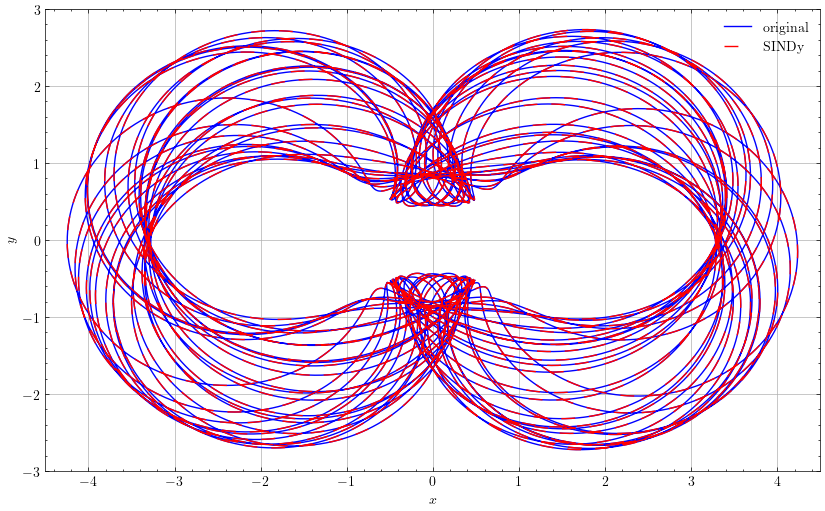

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_arr_mine_chaos[:,0],x_arr_mine_chaos[:,1],'b-',label='original')
plt.plot(x_arr_sindy_chaos[:,0],x_arr_sindy_chaos[:,1],'r--',linestyle=(0,(10,10)),label='SINDy')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.ylim(-3,3)
plt.xlim(-4.5,4.5)
plt.grid()
plt.legend()
plt.savefig("Trayectoria-SINDy-chaos.png")
plt.show()

OsciladorArmonico

dt = 0.005


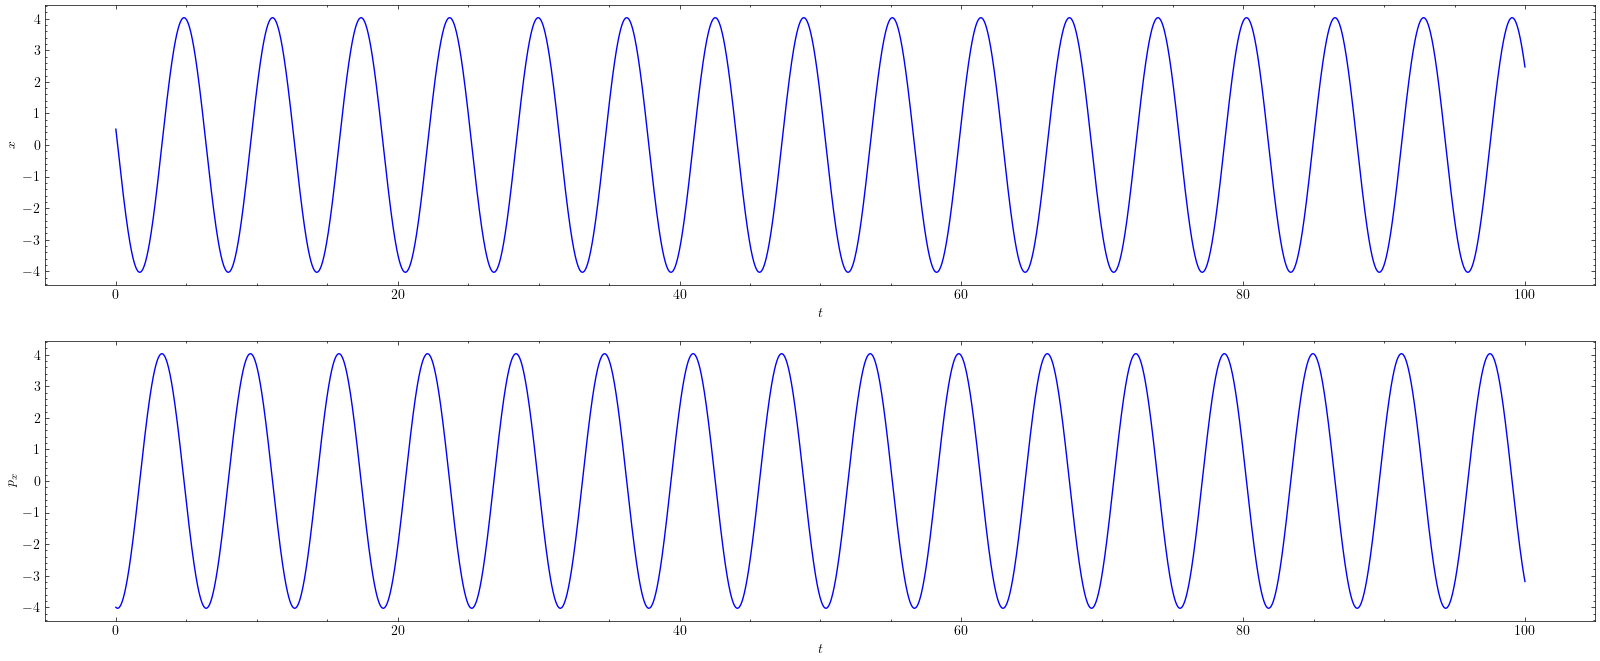

In [22]:
def Lorentz(y, t): #Ecuaciones de Henon Heiles
    x0,x1= y
    dydt = [x1
            ,-x0]
    return dydt
dt=0.005
k=1
t = np.arange(0, 100, dt)
x_arr = odeint(Lorentz, [.5,-4], t)
print('dt =', dt) #Pasos en dt
print('===========================================')
#Gráficas de series temporales#############   
fig, axs = plt.subplots(2, 1, figsize=(20, 8))
axs[0].plot(t, x_arr[:, 0], "b")
axs[0].set_xlabel(r"$t$")
axs[0].set_ylabel(r"$x$")
axs[1].plot(t, x_arr[:, 1], "b")
axs[1].set_xlabel(r"$t$")
axs[1].set_ylabel(r"$p_x$")
fig.show()

In [23]:

########Calculo de Derivadas##############
fd = FiniteDifference(order=2, drop_endpoints=True)
dx_arr = fd._differentiate(x_arr, t=dt) # Still pass dt

##########SINDy###############
threshold =0.02

model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold),
                 feature_library=ps.PolynomialLibrary(degree=2),
                 differentiation_method=fd) # Pass the differentiation method here
model.fit(x_arr, t=dt) # Also important to pass dt here

#############Coeficientes del modelo de ajuste#################
coef = model.coefficients()
print(coef[:, :])
print('===========================================')
model.print()
print('===========================================')

[[ 0.          0.          0.99999583  0.          0.          0.        ]
 [ 0.         -0.99999583  0.          0.          0.          0.        ]]
(x0)' = 1.000 x1
(x1)' = -1.000 x0


Iniciando la optimización...

--- Resultados de la Optimización ---
Parámetros óptimos: C1 = 1.031705, γ̃ = 0.483264
Energía mínima encontrada: E = 2.440198 Hartrees
Estado de la optimización: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL

Calculando la malla de energía para la visualización de superficie...


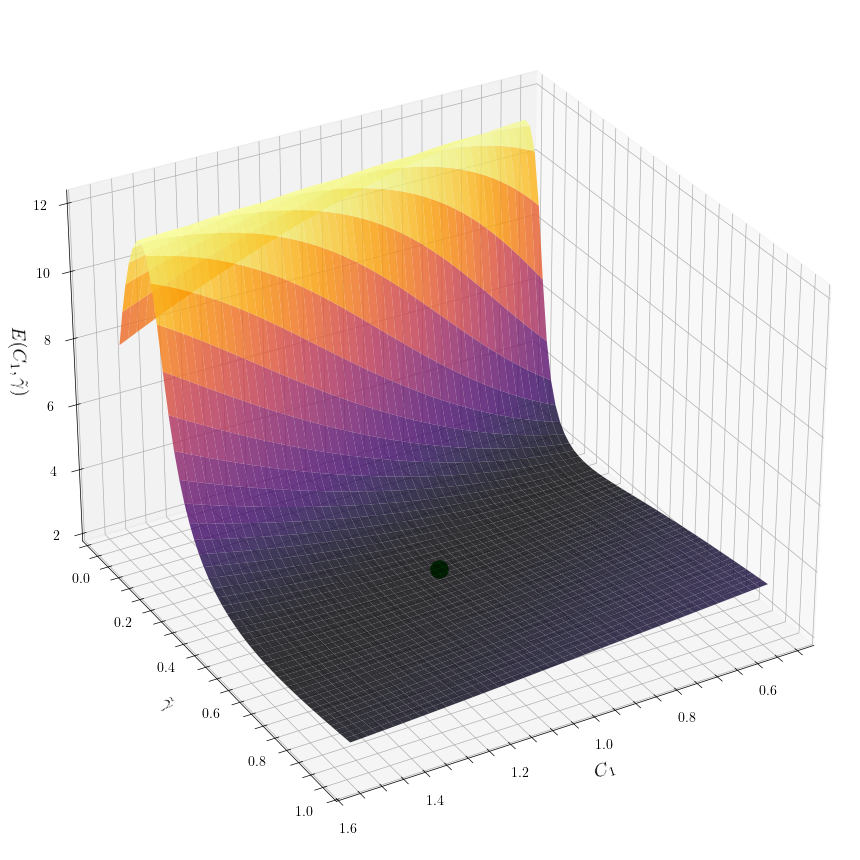

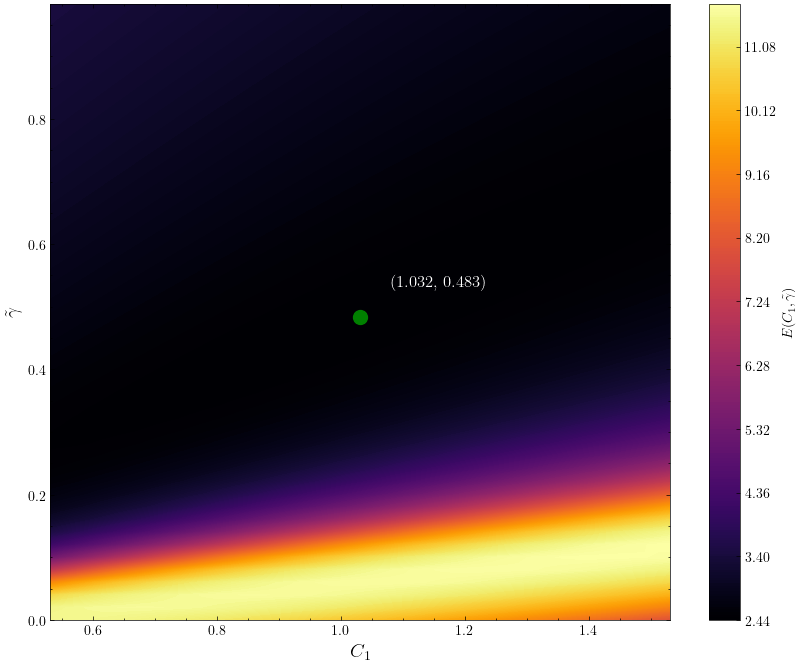


Calculando y graficando la amplitud de probabilidad de la función de onda óptima (con mayor resolución para el gráfico)...


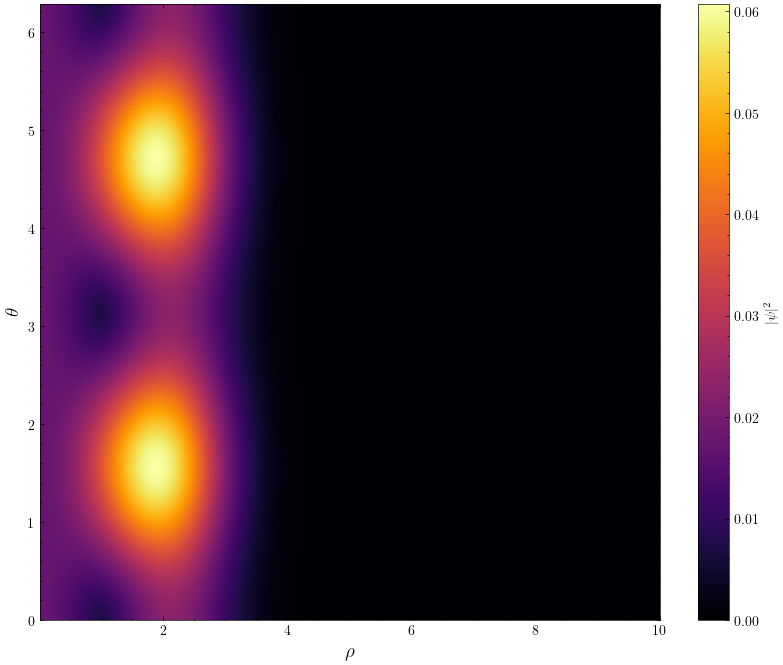

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.optimize import minimize
import matplotlib as mpl
import scienceplots
plt.style.use('science')
hbar = 1.0
m = 1.0
q = 1.0
a = 1.0
B = 1.0
eps0 = 1.0 / (4 * np.pi)
rho_min = 0.01
rho_max = 10.0
N_rho_calc = 100 
phi_min = 0.0
phi_max = 2 * np.pi
N_phi_calc = 100 
rho_grid_calc = np.linspace(rho_min, rho_max, N_rho_calc)
phi_grid_calc = np.linspace(phi_min, phi_max, N_phi_calc)
Rho_calc, Phi_calc = np.meshgrid(rho_grid_calc, phi_grid_calc, indexing='ij')

r1_calc = np.sqrt(Rho_calc**2 + a**2 - 2*a*Rho_calc*np.cos(Phi_calc))
r2_calc = np.sqrt(Rho_calc**2 + a**2 + 2*a*Rho_calc*np.cos(Phi_calc))

def calculate_E(C1, ga_tilde, return_psi=False):
    epsilon = 1e-10
    r1_safe = np.where(r1_calc < epsilon, epsilon, r1_calc)
    r2_safe = np.where(r2_calc < epsilon, epsilon, r2_calc)
    Rho_safe = np.where(Rho_calc < epsilon, epsilon, Rho_calc)
    f = C1 * (r1_safe + r2_safe) - B * ga_tilde * Rho_safe**2
    psi = np.exp(f)
    dr1_drho = (Rho_safe - a * np.cos(Phi_calc)) / r1_safe
    dr2_drho = (Rho_safe + a * np.cos(Phi_calc)) / r2_safe
    dr1_dphi = a * Rho_safe * np.sin(Phi_calc) / r1_safe
    dr2_dphi = -a * Rho_safe * np.sin(Phi_calc) / r2_safe

    df_drho = C1 * (dr1_drho + dr2_drho) - 2 * B * ga_tilde * Rho_safe
    df_dphi = C1 * (dr1_dphi + dr2_dphi)
    d2r1_drho2 = (1/r1_safe) - (Rho_safe - a*np.cos(Phi_calc))**2 / r1_safe**3
    d2r2_drho2 = (1/r2_safe) - (Rho_safe + a*np.cos(Phi_calc))**2 / r2_safe**3
    d2r1_dphi2 = a * Rho_safe * np.cos(Phi_calc) / r1_safe - (a * Rho_safe * np.sin(Phi_calc))**2 / r1_safe**3
    d2r2_dphi2 = -a * Rho_safe * np.cos(Phi_calc) / r2_safe - (-a * Rho_safe * np.sin(Phi_calc))**2 / r2_safe**3
    df_drho2 = C1 * (d2r1_drho2 + d2r2_drho2) - 2 * B * ga_tilde
    df_dphi2 = C1 * (d2r1_dphi2 + d2r2_dphi2)
    laplacian_f = (1/Rho_safe) * (df_drho + Rho_safe * df_drho2) + (1/Rho_safe**2) * df_dphi2

    grad_f_squared = df_drho**2 + (1/Rho_safe**2) * df_dphi**2
    d_psi_drho = psi * df_drho
    d2_psi_drho2 = psi * (df_drho**2 + df_drho2)
    
    d_psi_dphi = psi * df_dphi
    d2_psi_dphi2 = psi * (df_dphi**2 + df_dphi2)
    laplacian_psi = (1/Rho_safe) * (d_psi_drho + Rho_safe * d2_psi_drho2) + (1/Rho_safe**2) * d2_psi_dphi2
    kinetic_term = (-1/2) * laplacian_psi + 1j * (B/2) * d_psi_dphi + (B**2 * Rho_safe**2)/8 * psi
    V = (q**2 / (4 * np.pi * eps0)) * (1/r1_safe + 1/r2_safe+1/(2*a))
    H_psi = kinetic_term + V * psi
    integrand_energy = np.conj(psi) * H_psi * Rho_safe
    integrand_norm = np.conj(psi) * psi * Rho_safe
    energy_rho = simpson(integrand_energy, phi_grid_calc, axis=1)
    norm_rho = simpson(integrand_norm, phi_grid_calc, axis=1)
    integral_energy = simpson(energy_rho, rho_grid_calc)
    integral_norm = simpson(norm_rho, rho_grid_calc)
    
    if integral_norm <= 0:
        return np.inf
    
    E = integral_energy / integral_norm
    
    if return_psi:
        norm_factor = np.sqrt(integral_norm)
        return np.real(E), psi / norm_factor
    else:
        return np.real(E)

# 1. Función objetivo para la minimización
def objective_function(params):
    C1, ga_tilde = params
    return calculate_E(C1, ga_tilde)

# 2. Definir puntos iniciales y límites para la optimización
initial_guess = [-0.5, 0.5]
bounds = [(-2, 2), (0, 2)]

# 3. Realizar la minimización
print("Iniciando la optimización...")
result = minimize(
    objective_function,
    initial_guess,
    bounds=bounds,
    method='L-BFGS-B',
    options={'disp': True, 'maxiter': 100}
)

# 4. Mostrar los resultados
C1_optimal, ga_tilde_optimal = result.x
energy_minimal = result.fun

print("\n--- Resultados de la Optimización ---")
print(f"Parámetros óptimos: C1 = {C1_optimal:.6f}, γ̃ = {ga_tilde_optimal:.6f}")
print(f"Energía mínima encontrada: E = {energy_minimal:.6f} Hartrees")
print(f"Estado de la optimización: {result.message}")

# --- Visualización de la superficie de energía ---
# Parámetros para la malla de visualización de la superficie de energía
C1_min_plot_surf = C1_optimal - 0.5
C1_max_plot_surf = C1_optimal + 0.5
ga_min_plot_surf = ga_tilde_optimal - 0.5
ga_max_plot_surf = ga_tilde_optimal + 0.5

C1_min_plot_surf = max(bounds[0][0], C1_min_plot_surf)
C1_max_plot_surf = min(bounds[0][1], C1_max_plot_surf)
ga_min_plot_surf = max(bounds[1][0], ga_min_plot_surf)
ga_max_plot_surf = min(bounds[1][1], ga_max_plot_surf)

num_points_plot_surf = 50

C1_vals_plot_surf = np.linspace(C1_min_plot_surf, C1_max_plot_surf, num_points_plot_surf)
ga_vals_plot_surf = np.linspace(ga_min_plot_surf, ga_max_plot_surf, num_points_plot_surf)
E_grid_plot_surf = np.zeros((num_points_plot_surf, num_points_plot_surf))

print("\nCalculando la malla de energía para la visualización de superficie...")
for i, C1 in enumerate(C1_vals_plot_surf):
    for j, ga_tilde in enumerate(ga_vals_plot_surf):
        try:
            E_grid_plot_surf[j, i] = objective_function([C1, ga_tilde])
        except Exception as e: # Capturar la excepción para depuración
            print(f"Error calculando E para C1={C1:.2f}, ga_tilde={ga_tilde:.2f}: {e}")
            E_grid_plot_surf[j, i] = np.nan

C1_mesh_plot_surf, ga_mesh_plot_surf = np.meshgrid(C1_vals_plot_surf, ga_vals_plot_surf)
E_grid_masked = np.ma.masked_invalid(E_grid_plot_surf)

# Gráfico 3D
plt.figure(figsize=(12, 10))
ax = plt.subplot(111, projection='3d')
surf = ax.plot_surface(C1_mesh_plot_surf, ga_mesh_plot_surf, E_grid_masked, cmap='inferno', edgecolor='none', alpha=0.8)
ax.scatter(C1_optimal, ga_tilde_optimal, energy_minimal, s=150, c='green', marker='o', label='Mínimo Encontrado')
ax.set_xlabel(r'$C_1$',fontsize=14)
ax.view_init(elev=30, azim=60)
# Aquí puedes especificar una fuente si SciencePlots no te da la que quieres, pero ten cuidado.
# ax.set_ylabel(r'$\tilde{\gamma}$', fontfamily='DejaVu Sans') # Podría no ser necesario o causar conflictos
ax.set_ylabel(r'$\tilde{\gamma}$',fontsize=14)
ax.set_zlabel(r'$E(C_1,\tilde{\gamma})$',fontsize=14)
plt.savefig("Energy_spectrum_3D-2.jpg", dpi=300, bbox_inches='tight') # Añadir dpi y bbox_inches
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.95)
plt.show()

# Gráfico 2D con contornos
plt.figure(figsize=(10, 8))
contour = plt.contourf(C1_mesh_plot_surf, ga_mesh_plot_surf, E_grid_masked, levels=250, cmap='inferno')
plt.colorbar(contour, label=r'$E(C_1,\tilde{\gamma})$')
plt.plot(C1_optimal, ga_tilde_optimal, 'go', markersize=10, label=f'Óptimo: E = {energy_minimal:.4f}')
plt.annotate(f'({C1_optimal:.3f}, {ga_tilde_optimal:.3f})',
             (C1_optimal, ga_tilde_optimal),
             xytext=(C1_optimal + 0.05, ga_tilde_optimal + 0.05),
             color='white',
             fontsize=12)

plt.xlabel(r'$C_1$',fontsize=14)
plt.ylabel(r'$\tilde{\gamma}$',fontsize=14)
plt.savefig("Energy_spectrum_2D-2.jpg", dpi=300, bbox_inches='tight') # Añadir dpi y bbox_inches
plt.show()

print("\nCalculando y graficando la amplitud de probabilidad de la función de onda óptima (con mayor resolución para el gráfico)...")

N_rho_plot = 500 # Por ejemplo, 400 puntos en rho
N_phi_plot = 500 # Por ejemplo, 400 puntos en phi

rho_grid_plot = np.linspace(rho_min, rho_max, N_rho_plot)
phi_grid_plot = np.linspace(phi_min, phi_max, N_phi_plot)
Rho_plot, Phi_plot = np.meshgrid(rho_grid_plot, phi_grid_plot, indexing='ij')
r1_plot = np.sqrt(Rho_plot**2 + a**2 - 2*a*Rho_plot*np.cos(Phi_plot))
r2_plot = np.sqrt(Rho_plot**2 + a**2 + 2*a*Rho_plot*np.cos(Phi_plot))
epsilon = 1e-10
r1_plot_safe = np.where(r1_plot < epsilon, epsilon, r1_plot)
r2_plot_safe = np.where(r2_plot < epsilon, epsilon, r2_plot)
Rho_plot_safe = np.where(Rho_plot < epsilon, epsilon, Rho_plot)

# La función calculate_E ya devuelve la función de onda normalizada si return_psi es True.
# No es necesario recalcular la normalización de forma manual aquí si ya tienes la función.
# Si solo necesitas psi para la visualización, simplemente usa el cálculo directo.
f_optimal_plot = C1_optimal * (r1_plot_safe + r2_plot_safe) - B * ga_tilde_optimal * Rho_plot_safe**2
psi_optimal_plot_unnormalized = np.exp(f_optimal_plot)

# Para obtener la función de onda normalizada para el gráfico, podemos llamarla de nuevo
# con los parámetros óptimos y return_psi=True.
# Esto asegura que la normalización sea consistente con la que se usó para calcular la energía.
# Nota: La normalización se basa en las mallas de cálculo, no en las de plot.
_, psi_optimal_normalized_calc_grid = calculate_E(C1_optimal, ga_tilde_optimal, return_psi=True)

# Calcula el factor de normalización usando la psi_optimal_normalized_calc_grid
# que ya está normalizada en la malla de cálculo.
# Si quieres normalizar la psi_optimal_plot_unnormalized, necesitas hacer la integración
# sobre la malla de plot, o usar el factor de normalización de la malla de cálculo.
# Usaremos el factor de normalización de la malla de cálculo para consistencia.

# Recalculamos el integral_norm_calc para asegurar que sea el mismo factor que se usó
# en calculate_E cuando se devolvió psi normalizada.
f_optimal_calc = C1_optimal * (np.where(r1_calc < epsilon, epsilon, r1_calc) + np.where(r2_calc < epsilon, epsilon, r2_calc)) - B * ga_tilde_optimal * np.where(Rho_calc < epsilon, epsilon, Rho_calc)**2
psi_optimal_calc_for_norm = np.exp(f_optimal_calc)
integral_norm_calc = simpson(simpson(np.conj(psi_optimal_calc_for_norm) * psi_optimal_calc_for_norm * np.where(Rho_calc < epsilon, epsilon, Rho_calc), phi_grid_calc, axis=1), rho_grid_calc)
norm_factor_global = np.sqrt(integral_norm_calc)

# Ahora normaliza la psi_optimal_plot_unnormalized con este factor.
psi_optimal_normalized_plot = psi_optimal_plot_unnormalized / norm_factor_global
probability_amplitude = np.abs(psi_optimal_normalized_plot)**2

plt.figure(figsize=(10, 8))
# Es importante que pcolormesh reciba los argumentos x, y, Z en el orden correcto
# y Z debe tener la transpuesta adecuada si indexas con 'ij'.
# Si Rho_plot y Phi_plot fueron creados con indexing='ij', entonces Z debería ser .T
plt.pcolormesh(rho_grid_plot, phi_grid_plot, probability_amplitude.T, cmap='inferno', shading='gouraud')
plt.colorbar(label='$|\psi|^2$')
plt.xlabel(r'$\rho$',fontsize=14)
plt.ylabel(r'$\theta$',fontsize=14)
plt.savefig("Amplitud-Probabilidad-2.jpg", dpi=300, bbox_inches='tight')
plt.show()

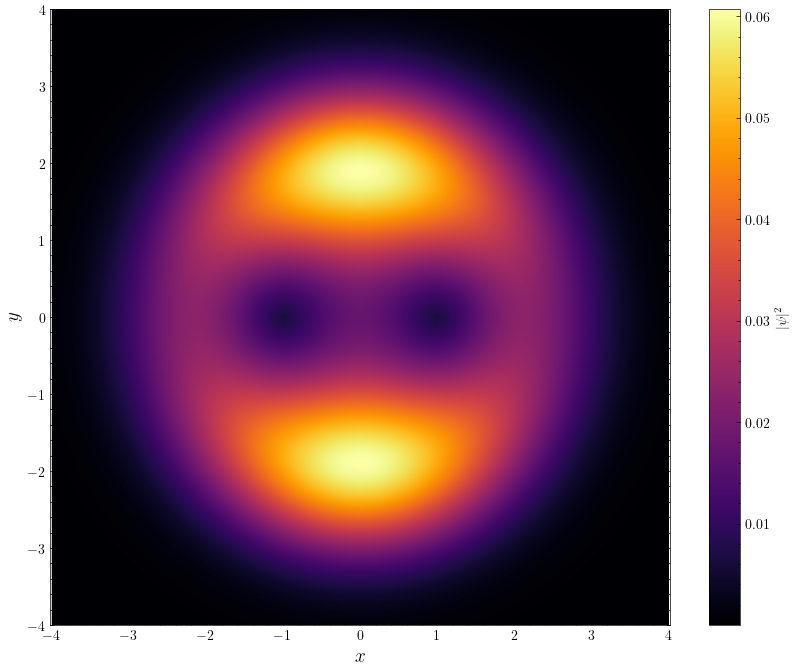

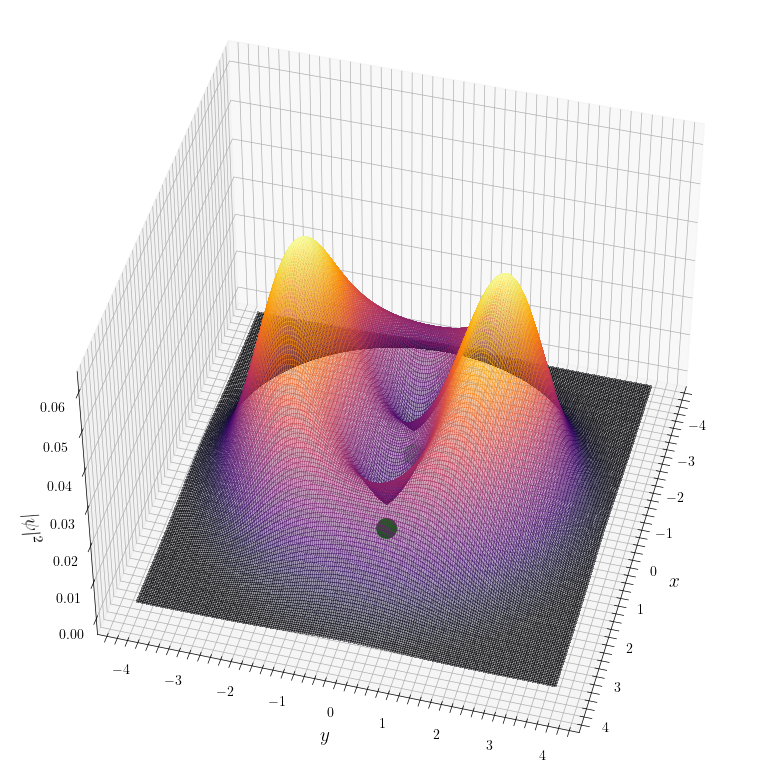

In [2]:
x_max_plot = rho_max
y_max_plot = rho_max
N_xy_plot = 1000  # Número de puntos en cada eje para alta resolución

x_grid_plot = np.linspace(-4, 4, N_xy_plot)
y_grid_plot = np.linspace(-4, 4, N_xy_plot)
X, Y = np.meshgrid(x_grid_plot, y_grid_plot, indexing='xy')

# 2. Transformar de coordenadas cartesianas (x, y) a polares (rho, phi)
#    Para cada punto (x,y), calculamos su rho y phi correspondientes.
Rho_plot_new = np.sqrt(X**2 + Y**2)
Phi_plot_new = np.arctan2(Y, X)

# 3. Recalcular las distancias r1 y r2 en la nueva malla
#    Se necesitan r1 y r2 para la función de onda.
r1_plot_new = np.sqrt(Rho_plot_new**2 + a**2 - 2*a*Rho_plot_new*np.cos(Phi_plot_new))
r2_plot_new = np.sqrt(Rho_plot_new**2 + a**2 + 2*a*Rho_plot_new*np.cos(Phi_plot_new))

# 4. Calcular la función de onda en la nueva malla
#    Aplicamos la función de onda con los parámetros óptimos a la nueva malla de puntos.
epsilon = 1e-10
r1_plot_new_safe = np.where(r1_plot_new < epsilon, epsilon, r1_plot_new)
r2_plot_new_safe = np.where(r2_plot_new < epsilon, epsilon, r2_plot_new)
Rho_plot_new_safe = np.where(Rho_plot_new < epsilon, epsilon, Rho_plot_new)

f_optimal_plot_new = C1_optimal * (r1_plot_new_safe + r2_plot_new_safe) - B * ga_tilde_optimal * Rho_plot_new_safe**2
psi_optimal_plot_unnormalized = np.exp(f_optimal_plot_new)

# 5. Usar el mismo factor de normalización calculado previamente
#    Esto asegura que la amplitud de probabilidad sea consistente.
f_optimal_calc = C1_optimal * (np.where(r1_calc < epsilon, epsilon, r1_calc) + np.where(r2_calc < epsilon, epsilon, r2_calc)) - B * ga_tilde_optimal * np.where(Rho_calc < epsilon, epsilon, Rho_calc)**2
psi_optimal_calc_for_norm = np.exp(f_optimal_calc)
integral_norm_calc = simpson(simpson(np.conj(psi_optimal_calc_for_norm) * psi_optimal_calc_for_norm * np.where(Rho_calc < epsilon, epsilon, Rho_calc), phi_grid_calc, axis=1), rho_grid_calc)
norm_factor_global = np.sqrt(integral_norm_calc)

psi_optimal_normalized_plot = psi_optimal_plot_unnormalized / norm_factor_global
probability_amplitude = np.abs(psi_optimal_normalized_plot)**2

# 6. Crear la gráfica en coordenadas cartesianas (x,y)
plt.figure(figsize=(10, 8))
# Usamos pcolormesh con la nueva malla X, Y y la amplitud de probabilidad Z
plt.pcolormesh(X, Y, probability_amplitude, cmap='inferno', shading='gouraud')
plt.colorbar(label='$|\psi|^2$')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
# Marcamos las posiciones de los centros de carga para referencia
plt.axis('equal') # Para asegurar que los ejes tengan la misma escala y el círculo se vea circular
plt.savefig("Amplitud-Probabilidad-Cartesiana-2.jpg", dpi=300, bbox_inches='tight')
plt.show()
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Creamos la superficie 3D
surf = ax.plot_surface(X, Y, probability_amplitude, cmap='inferno', rstride=5, cstride=5, linewidth=0, antialiased=False, alpha=0.4)

point_x = [-1, 1]
point_y = [0, 0]
point_z = [0, 0]

# Añadir los puntos a la gráfica
ax.scatter(point_x, point_y, point_z, color='green',s=200) # El parámetro 's' ajusta el tamaño de los puntos
# Configuramos los ejes
ax.view_init(elev=45,azim=15)
ax.set_xlabel(r'$x$',fontsize=14)
ax.set_ylabel(r'$y$',fontsize=14)
ax.set_zlabel(r'$|\psi|^2$',fontsize=14)

plt.savefig("Amplitud-Probabilidad-3D-2.jpg", dpi=300, bbox_inches='tight')
plt.show()

Iniciando la optimización...

--- Resultados de la Optimización ---
Parámetros óptimos: C1 = -1.024410, γ̃ = 0.000000
Energía mínima encontrada: E = -1.501085 Hartrees
Estado de la optimización: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL

Calculando la malla de energía para la visualización de superficie...


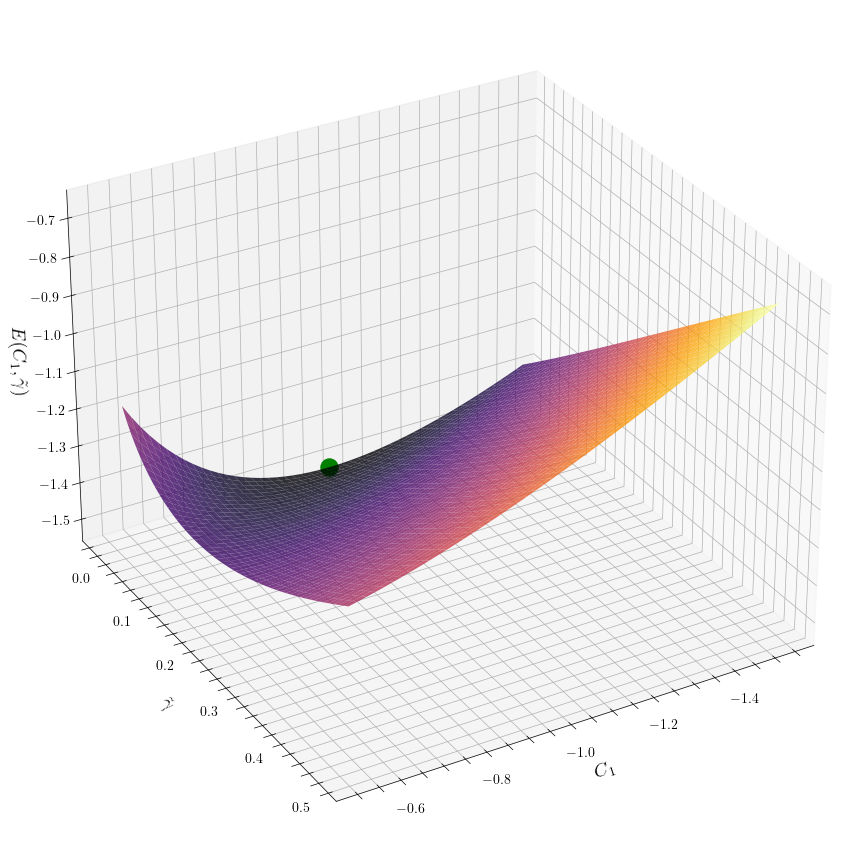

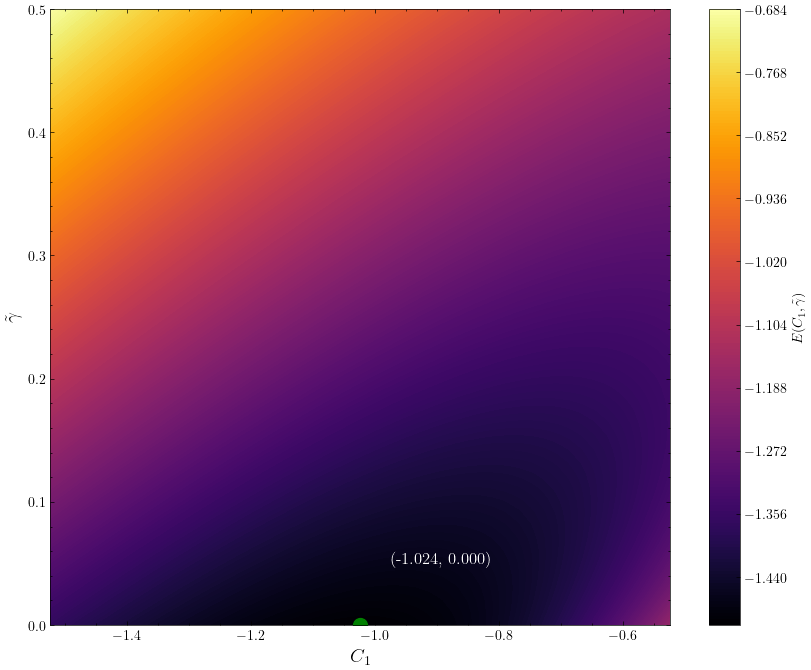


Calculando y graficando la amplitud de probabilidad de la función de onda óptima (con mayor resolución para el gráfico)...


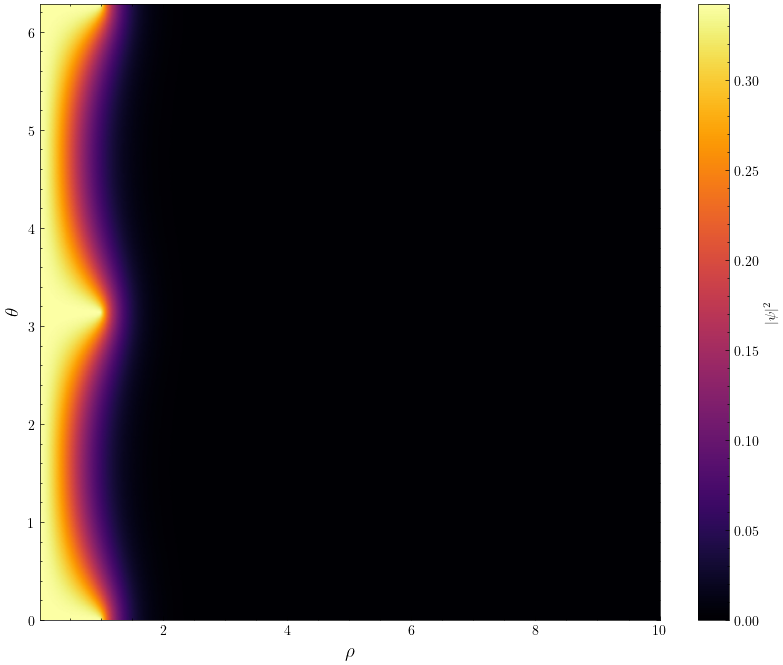

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.optimize import minimize
import matplotlib as mpl
import scienceplots
plt.style.use('science')
hbar = 1.0
m = 1.0
q = 1.0
a = 1.0
B = 1.0
eps0 = 1.0 / (4 * np.pi)
rho_min = 0.01
rho_max = 10.0
N_rho_calc = 100 
phi_min = 0.0
phi_max = 2 * np.pi
N_phi_calc = 100 
rho_grid_calc = np.linspace(rho_min, rho_max, N_rho_calc)
phi_grid_calc = np.linspace(phi_min, phi_max, N_phi_calc)
Rho_calc, Phi_calc = np.meshgrid(rho_grid_calc, phi_grid_calc, indexing='ij')

r1_calc = np.sqrt(Rho_calc**2 + a**2 - 2*a*Rho_calc*np.cos(Phi_calc))
r2_calc = np.sqrt(Rho_calc**2 + a**2 + 2*a*Rho_calc*np.cos(Phi_calc))

def calculate_E(C1, ga_tilde, return_psi=False):
    epsilon = 1e-10
    r1_safe = np.where(r1_calc < epsilon, epsilon, r1_calc)
    r2_safe = np.where(r2_calc < epsilon, epsilon, r2_calc)
    Rho_safe = np.where(Rho_calc < epsilon, epsilon, Rho_calc)
    f = C1 * (r1_safe + r2_safe) - B * ga_tilde * Rho_safe**2
    psi = np.exp(f)
    dr1_drho = (Rho_safe - a * np.cos(Phi_calc)) / r1_safe
    dr2_drho = (Rho_safe + a * np.cos(Phi_calc)) / r2_safe
    dr1_dphi = a * Rho_safe * np.sin(Phi_calc) / r1_safe
    dr2_dphi = -a * Rho_safe * np.sin(Phi_calc) / r2_safe

    df_drho = C1 * (dr1_drho + dr2_drho) - 2 * B * ga_tilde * Rho_safe
    df_dphi = C1 * (dr1_dphi + dr2_dphi)
    d2r1_drho2 = (1/r1_safe) - (Rho_safe - a*np.cos(Phi_calc))**2 / r1_safe**3
    d2r2_drho2 = (1/r2_safe) - (Rho_safe + a*np.cos(Phi_calc))**2 / r2_safe**3
    d2r1_dphi2 = a * Rho_safe * np.cos(Phi_calc) / r1_safe - (a * Rho_safe * np.sin(Phi_calc))**2 / r1_safe**3
    d2r2_dphi2 = -a * Rho_safe * np.cos(Phi_calc) / r2_safe - (-a * Rho_safe * np.sin(Phi_calc))**2 / r2_safe**3
    df_drho2 = C1 * (d2r1_drho2 + d2r2_drho2) - 2 * B * ga_tilde
    df_dphi2 = C1 * (d2r1_dphi2 + d2r2_dphi2)
    laplacian_f = (1/Rho_safe) * (df_drho + Rho_safe * df_drho2) + (1/Rho_safe**2) * df_dphi2

    grad_f_squared = df_drho**2 + (1/Rho_safe**2) * df_dphi**2
    d_psi_drho = psi * df_drho
    d2_psi_drho2 = psi * (df_drho**2 + df_drho2)
    
    d_psi_dphi = psi * df_dphi
    d2_psi_dphi2 = psi * (df_dphi**2 + df_dphi2)
    laplacian_psi = (1/Rho_safe) * (d_psi_drho + Rho_safe * d2_psi_drho2) + (1/Rho_safe**2) * d2_psi_dphi2
    kinetic_term = (-1/2) * laplacian_psi + 1j * (B/2) * d_psi_dphi + (B**2 * Rho_safe**2)/8 * psi
    V = -(q**2 / (4 * np.pi * eps0)) * (1/r1_safe + 1/r2_safe)+(q**2 / (8*a* np.pi * eps0))
    H_psi = kinetic_term + V * psi
    integrand_energy = np.conj(psi) * H_psi * Rho_safe
    integrand_norm = np.conj(psi) * psi * Rho_safe
    energy_rho = simpson(integrand_energy, phi_grid_calc, axis=1)
    norm_rho = simpson(integrand_norm, phi_grid_calc, axis=1)
    integral_energy = simpson(energy_rho, rho_grid_calc)
    integral_norm = simpson(norm_rho, rho_grid_calc)
    
    if integral_norm <= 0:
        return np.inf
    
    E = integral_energy / integral_norm
    
    if return_psi:
        norm_factor = np.sqrt(integral_norm)
        return np.real(E), psi / norm_factor
    else:
        return np.real(E)

# 1. Función objetivo para la minimización
def objective_function(params):
    C1, ga_tilde = params
    return calculate_E(C1, ga_tilde)

# 2. Definir puntos iniciales y límites para la optimización
initial_guess = [-0.5, 0.5]
bounds = [(-2, 2), (0, 2)]

# 3. Realizar la minimización
print("Iniciando la optimización...")
result = minimize(
    objective_function,
    initial_guess,
    bounds=bounds,
    method='L-BFGS-B',
    options={'disp': True, 'maxiter': 100}
)

# 4. Mostrar los resultados
C1_optimal, ga_tilde_optimal = result.x
energy_minimal = result.fun

print("\n--- Resultados de la Optimización ---")
print(f"Parámetros óptimos: C1 = {C1_optimal:.6f}, γ̃ = {ga_tilde_optimal:.6f}")
print(f"Energía mínima encontrada: E = {energy_minimal:.6f} Hartrees")
print(f"Estado de la optimización: {result.message}")

# --- Visualización de la superficie de energía ---
# Parámetros para la malla de visualización de la superficie de energía
C1_min_plot_surf = C1_optimal - 0.5
C1_max_plot_surf = C1_optimal + 0.5
ga_min_plot_surf = ga_tilde_optimal - 0.5
ga_max_plot_surf = ga_tilde_optimal + 0.5

C1_min_plot_surf = max(bounds[0][0], C1_min_plot_surf)
C1_max_plot_surf = min(bounds[0][1], C1_max_plot_surf)
ga_min_plot_surf = max(bounds[1][0], ga_min_plot_surf)
ga_max_plot_surf = min(bounds[1][1], ga_max_plot_surf)

num_points_plot_surf = 50

C1_vals_plot_surf = np.linspace(C1_min_plot_surf, C1_max_plot_surf, num_points_plot_surf)
ga_vals_plot_surf = np.linspace(ga_min_plot_surf, ga_max_plot_surf, num_points_plot_surf)
E_grid_plot_surf = np.zeros((num_points_plot_surf, num_points_plot_surf))

print("\nCalculando la malla de energía para la visualización de superficie...")
for i, C1 in enumerate(C1_vals_plot_surf):
    for j, ga_tilde in enumerate(ga_vals_plot_surf):
        try:
            E_grid_plot_surf[j, i] = objective_function([C1, ga_tilde])
        except Exception as e: # Capturar la excepción para depuración
            print(f"Error calculando E para C1={C1:.2f}, ga_tilde={ga_tilde:.2f}: {e}")
            E_grid_plot_surf[j, i] = np.nan

C1_mesh_plot_surf, ga_mesh_plot_surf = np.meshgrid(C1_vals_plot_surf, ga_vals_plot_surf)
E_grid_masked = np.ma.masked_invalid(E_grid_plot_surf)

# Gráfico 3D
plt.figure(figsize=(12, 10))
ax = plt.subplot(111, projection='3d')
surf = ax.plot_surface(C1_mesh_plot_surf, ga_mesh_plot_surf, E_grid_masked, cmap='inferno', edgecolor='none', alpha=0.8)
ax.scatter(C1_optimal, ga_tilde_optimal, energy_minimal, s=150, c='green', marker='o', label='Mínimo Encontrado')
ax.set_xlabel(r'$C_1$',fontsize=14)
ax.view_init(elev=30, azim=60)
# Aquí puedes especificar una fuente si SciencePlots no te da la que quieres, pero ten cuidado.
# ax.set_ylabel(r'$\tilde{\gamma}$', fontfamily='DejaVu Sans') # Podría no ser necesario o causar conflictos
ax.set_ylabel(r'$\tilde{\gamma}$',fontsize=14)
ax.set_zlabel(r'$E(C_1,\tilde{\gamma})$',fontsize=14)
plt.savefig("Energy_spectrum_3D-2.jpg", dpi=300, bbox_inches='tight') # Añadir dpi y bbox_inches
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.95)
plt.show()

# Gráfico 2D con contornos
plt.figure(figsize=(10, 8))
contour = plt.contourf(C1_mesh_plot_surf, ga_mesh_plot_surf, E_grid_masked, levels=250, cmap='inferno')
plt.colorbar(contour, label=r'$E(C_1,\tilde{\gamma})$')
plt.plot(C1_optimal, ga_tilde_optimal, 'go', markersize=10, label=f'Óptimo: E = {energy_minimal:.4f}')
plt.annotate(f'({C1_optimal:.3f}, {ga_tilde_optimal:.3f})',
             (C1_optimal, ga_tilde_optimal),
             xytext=(C1_optimal + 0.05, ga_tilde_optimal + 0.05),
             color='white',
             fontsize=12)

plt.xlabel(r'$C_1$',fontsize=14)
plt.ylabel(r'$\tilde{\gamma}$',fontsize=14)
plt.savefig("Energy_spectrum_2D-2.jpg", dpi=300, bbox_inches='tight') # Añadir dpi y bbox_inches
plt.show()

print("\nCalculando y graficando la amplitud de probabilidad de la función de onda óptima (con mayor resolución para el gráfico)...")

N_rho_plot = 500 # Por ejemplo, 400 puntos en rho
N_phi_plot = 500 # Por ejemplo, 400 puntos en phi

rho_grid_plot = np.linspace(rho_min, rho_max, N_rho_plot)
phi_grid_plot = np.linspace(phi_min, phi_max, N_phi_plot)
Rho_plot, Phi_plot = np.meshgrid(rho_grid_plot, phi_grid_plot, indexing='ij')
r1_plot = np.sqrt(Rho_plot**2 + a**2 - 2*a*Rho_plot*np.cos(Phi_plot))
r2_plot = np.sqrt(Rho_plot**2 + a**2 + 2*a*Rho_plot*np.cos(Phi_plot))
epsilon = 1e-10
r1_plot_safe = np.where(r1_plot < epsilon, epsilon, r1_plot)
r2_plot_safe = np.where(r2_plot < epsilon, epsilon, r2_plot)
Rho_plot_safe = np.where(Rho_plot < epsilon, epsilon, Rho_plot)

# La función calculate_E ya devuelve la función de onda normalizada si return_psi es True.
# No es necesario recalcular la normalización de forma manual aquí si ya tienes la función.
# Si solo necesitas psi para la visualización, simplemente usa el cálculo directo.
f_optimal_plot = C1_optimal * (r1_plot_safe + r2_plot_safe) - B * ga_tilde_optimal * Rho_plot_safe**2
psi_optimal_plot_unnormalized = np.exp(f_optimal_plot)

# Para obtener la función de onda normalizada para el gráfico, podemos llamarla de nuevo
# con los parámetros óptimos y return_psi=True.
# Esto asegura que la normalización sea consistente con la que se usó para calcular la energía.
# Nota: La normalización se basa en las mallas de cálculo, no en las de plot.
_, psi_optimal_normalized_calc_grid = calculate_E(C1_optimal, ga_tilde_optimal, return_psi=True)

# Calcula el factor de normalización usando la psi_optimal_normalized_calc_grid
# que ya está normalizada en la malla de cálculo.
# Si quieres normalizar la psi_optimal_plot_unnormalized, necesitas hacer la integración
# sobre la malla de plot, o usar el factor de normalización de la malla de cálculo.
# Usaremos el factor de normalización de la malla de cálculo para consistencia.

# Recalculamos el integral_norm_calc para asegurar que sea el mismo factor que se usó
# en calculate_E cuando se devolvió psi normalizada.
f_optimal_calc = C1_optimal * (np.where(r1_calc < epsilon, epsilon, r1_calc) + np.where(r2_calc < epsilon, epsilon, r2_calc)) - B * ga_tilde_optimal * np.where(Rho_calc < epsilon, epsilon, Rho_calc)**2
psi_optimal_calc_for_norm = np.exp(f_optimal_calc)
integral_norm_calc = simpson(simpson(np.conj(psi_optimal_calc_for_norm) * psi_optimal_calc_for_norm * np.where(Rho_calc < epsilon, epsilon, Rho_calc), phi_grid_calc, axis=1), rho_grid_calc)
norm_factor_global = np.sqrt(integral_norm_calc)

# Ahora normaliza la psi_optimal_plot_unnormalized con este factor.
psi_optimal_normalized_plot = psi_optimal_plot_unnormalized / norm_factor_global
probability_amplitude = np.abs(psi_optimal_normalized_plot)**2

plt.figure(figsize=(10, 8))
# Es importante que pcolormesh reciba los argumentos x, y, Z en el orden correcto
# y Z debe tener la transpuesta adecuada si indexas con 'ij'.
# Si Rho_plot y Phi_plot fueron creados con indexing='ij', entonces Z debería ser .T
plt.pcolormesh(rho_grid_plot, phi_grid_plot, probability_amplitude.T, cmap='inferno', shading='gouraud')
plt.colorbar(label='$|\psi|^2$')
plt.xlabel(r'$\rho$',fontsize=14)
plt.ylabel(r'$\theta$',fontsize=14)
plt.savefig("Amplitud-Probabilidad-2.jpg", dpi=300, bbox_inches='tight')
plt.show()

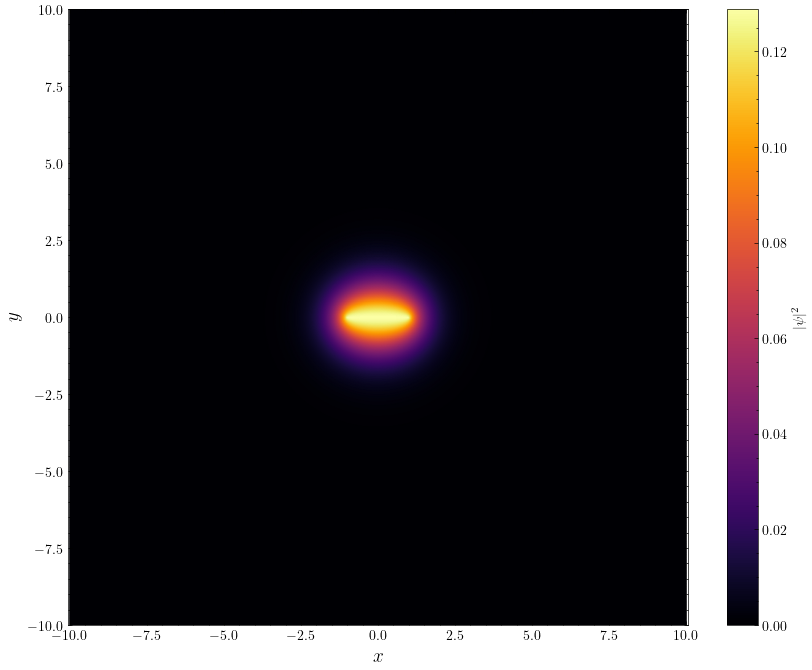

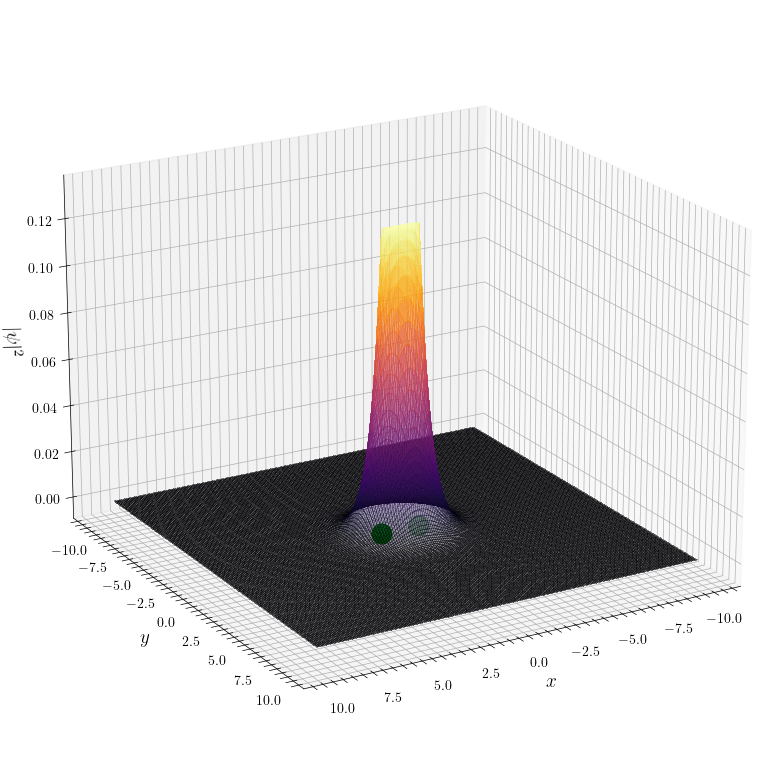

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.optimize import minimize
import matplotlib as mpl
import scienceplots
plt.style.use('science')
rho_max=10
x_max_plot = rho_max
y_max_plot = rho_max
N_xy_plot = 1000  # Número de puntos en cada eje para alta resolución

x_grid_plot = np.linspace(-10, 10, N_xy_plot)
y_grid_plot = np.linspace(-10, 10, N_xy_plot)
X, Y = np.meshgrid(x_grid_plot, y_grid_plot, indexing='xy')

psi_optimal=np.exp(-1.02441*(np.sqrt((X-1)**2+Y**2)+np.sqrt((X+1)**2+Y**2)))
probability_amplitude = psi_optimal

# 6. Crear la gráfica en coordenadas cartesianas (x,y)
plt.figure(figsize=(10, 8))
# Usamos pcolormesh con la nueva malla X, Y y la amplitud de probabilidad Z
plt.pcolormesh(X, Y, probability_amplitude, cmap='inferno', shading='gouraud')
plt.colorbar(label='$|\psi|^2$')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.xlabel(r'$x$',fontsize=14)
plt.ylabel(r'$y$',fontsize=14)
# Marcamos las posiciones de los centros de carga para referencia
plt.axis('equal') # Para asegurar que los ejes tengan la misma escala y el círculo se vea circular
plt.savefig("Amplitud-Probabilidad-Cartesiana.jpg", dpi=300, bbox_inches='tight')
plt.show()
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Creamos la superficie 3D
surf = ax.plot_surface(X, Y, probability_amplitude, cmap='inferno', rstride=5, cstride=5, linewidth=0, antialiased=False, alpha=0.4)

point_x = [-1, 1]
point_y = [0, 0]
point_z = [0, 0]

# Añadir los puntos a la gráfica
ax.scatter(point_x, point_y, point_z, color='green',s=200) # El parámetro 's' ajusta el tamaño de los puntos
# Configuramos los ejes
ax.view_init(elev=20,azim=60)
ax.set_xlabel(r'$x$',fontsize=14)
ax.set_ylabel(r'$y$',fontsize=14)
ax.set_zlabel(r'$|\psi|^2$',fontsize=14)

plt.savefig("Amplitud-Probabilidad-3D.jpg", dpi=300, bbox_inches='tight')
plt.show()